Load the testing data (Unseen data)

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.metrics import accuracy_score, roc_curve, auc
import numpy
from sklearn import metrics
from sklearn import datasets
import sys
sys.path.append("./iris")
plt.rcParams['figure.figsize'] = (15, 10)

Using Theano backend.


# Load the Data

In [2]:
X_train = np.load('./pima/X_train.npy')
y_train = np.load('./pima/y_train.npy')
X_test = np.load('./pima/X_test.npy')
y_test = np.load('./pima/y_test.npy')
X_deploy = np.load('./pima/X_deploy.npy')
y_deploy = np.load('./pima/y_deploy.npy')

print('Number of training examples',len(X_train))
print('Number of validation examples',len(X_test))
print('Number of testing examples',len(X_deploy))

Number of training examples 491
Number of validation examples 123
Number of testing examples 154


# Initialize the classifiers as the training time


In [3]:
from sklearn.neighbors import KNeighborsClassifier
clf_neigh = KNeighborsClassifier(n_neighbors=5)
clf_neigh.fit(X_train, y_train)
from sklearn.svm import LinearSVC
clf_svm_linear = LinearSVC(C=20.0)
clf_svm_linear.fit(X_train, y_train)
from sklearn.svm import SVC
clf_svm = SVC(C=5.0, kernel='rbf')
clf_svm.fit(X_train, y_train)
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(min_samples_split=2)
clf_dt.fit(X_train, y_train)
from sklearn.tree import DecisionTreeClassifier
clf_dt_IG = DecisionTreeClassifier(criterion='entropy', min_samples_split=2)
clf_dt_IG.fit(X_train, y_train)
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
clf_dt_BGKN = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),
                             max_samples=0.5, max_features=0.5)
clf_dt_BGKN.fit(X_train, y_train)
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
clf_dt_BGDT = BaggingClassifier(DecisionTreeClassifier(criterion='entropy', min_samples_split=2),
                             max_samples=0.5, max_features=0.5)
clf_dt_BGDT.fit(X_train, y_train)
from sklearn.ensemble import RandomForestClassifier
clf_dt_RF = RandomForestClassifier()
#Training
start_time = time.time()
clf_dt_RF.fit(X_train, y_train)
from sklearn.ensemble import AdaBoostClassifier
clf_dt_AD = AdaBoostClassifier()
clf_dt_AD.fit(X_train, y_train)
from sklearn.naive_bayes import GaussianNB
clf_NB = GaussianNB()
clf_NB.fit(X_train, y_train)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf_dt_LDA = LinearDiscriminantAnalysis()
clf_dt_LDA.fit(X_train, y_train)
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf_dt_QDA = QuadraticDiscriminantAnalysis()
clf_dt_QDA.fit(X_train, y_train)

from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression(C=1e5)
LogReg.fit(X_train, y_train)

from sklearn.gaussian_process import GaussianProcessClassifier
GP = GaussianProcessClassifier()
GP.fit(X_train, y_train)

import lightgbm as lgb
lgb_train = lgb.Dataset(X_train, y_train)
gbm = lgb.LGBMClassifier()
gbm.fit(X_train, y_train)

import xgboost as xgb
XG_Boost = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(X_train, y_train)



In [4]:
import seaborn as sns
import numpy as np
from sklearn.cross_validation import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2
from keras.utils import np_utils
labelsDepy = np_utils.to_categorical(y_deploy)                                                                                           
model = Sequential()
model.add(Dense(35,
                input_shape=(8,), 
                activation="relu"))
 
#model.add(Dropout(0.5))
model.add(Dense(2, activation="softmax"))
model.load_weights('pimaModelbest.hdf5')
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='Adadelta')
# Actual modelling





import seaborn as sns
import numpy as np
from sklearn.cross_validation import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2

from keras.utils import np_utils

labelsTrain = np_utils.to_categorical(y_train)
labelsTest = np_utils.to_categorical(y_test)                                              
model = Sequential()
model.add(Dense(35,
                input_shape=(8,), 
                activation="relu"))
##model.add(Dropout(0.5))
model.add(Dense(2, activation="softmax"))

model.load_weights('/Users/salemameen/Desktop/banditsbook/python_pima/PimaModelbest.hdf5')


model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='Adadelta')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## UCB1

In [5]:
# MAB_NN(16.67%REMOVED) MODEL1
model1 = Sequential()
model1.add(Dense(35,
                input_shape=(8,), 
                activation="relu"))
 
model1.add(Dropout(0.5))
model1.add(Dense(2, activation="softmax"))
model1.load_weights('./UCB1/pima5.hdf5')
model1.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='Adadelta')

In [6]:
# MAB_NN(33.33%REMOVED) MODEL2
model2 = Sequential()
model2.add(Dense(35,
                input_shape=(8,), 
                activation="relu"))
 
model2.add(Dropout(0.5))
model2.add(Dense(2, activation="softmax"))
model2.load_weights('./UCB1/pima9.hdf5')
model2.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='Adadelta')

In [7]:
# MAB_NN(50%REMOVED) MODEL3
model3 = Sequential()
model3.add(Dense(35,
                input_shape=(8,), 
                activation="relu"))
 
model3.add(Dropout(0.5))
model3.add(Dense(2, activation="softmax"))
model3.load_weights('./UCB1/pima14.hdf5')
model3.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='Adadelta')

In [8]:
# MAB_NN(50%REMOVED) MODEL3
model4 = Sequential()
model4.add(Dense(35,
                input_shape=(8,), 
                activation="relu"))
 
model4.add(Dropout(0.5))
model4.add(Dense(2, activation="softmax"))
model4.load_weights('./UCB1/pima14.hdf5')
model4.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='Adadelta')

## Espsilon Greedy

In [9]:
# MAB_NN(16.67%REMOVED) MODEL1
model_EG = Sequential()
model_EG.add(Dense(35,
                input_shape=(8,), 
                activation="relu"))
 
model_EG.add(Dropout(0.5))
model_EG.add(Dense(2, activation="softmax"))
model_EG.load_weights('./EpsilonGreedy/pima5.hdf5')
model_EG.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='Adadelta')

## Annealing Epsilon Greedy

In [10]:
# MAB_NN(16.67%REMOVED) MODEL1
model_AEG = Sequential()
model_AEG.add(Dense(35,
                input_shape=(8,), 
                activation="relu"))
 
model_AEG.add(Dropout(0.5))
model_AEG.add(Dense(2, activation="softmax"))
model_AEG.load_weights('./AnnealingEpsilonGreedy/pima5.hdf5')
model_AEG.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='Adadelta')

## SOFTMAX

In [11]:
# MAB_NN(16.67%REMOVED) MODEL1
model_SM = Sequential()
model_SM.add(Dense(35,
                input_shape=(8,), 
                activation="relu"))
 
model_SM.add(Dropout(0.5))
model_SM.add(Dense(2, activation="softmax"))
model_SM.load_weights('./Softmax/pima5.hdf5')
model_SM.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='Adadelta')

## ANNEELYING SOFTMAX

In [12]:
# MAB_NN(16.67%REMOVED) MODEL1
model_ASM = Sequential()
model_ASM.add(Dense(35,
                input_shape=(8,), 
                activation="relu"))
 
model_ASM.add(Dropout(0.5))
model_ASM.add(Dense(2, activation="softmax"))
model_ASM.load_weights('./AnnealingSoftmax/pima5.hdf5')
model_ASM.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='Adadelta')

## THOMPSON SAMBLING

In [13]:
# MAB_NN(16.67%REMOVED) MODEL1
model_TS = Sequential()
model_TS.add(Dense(35,
                input_shape=(8,), 
                activation="relu"))
 
model_TS.add(Dropout(0.5))
model_TS.add(Dense(2, activation="softmax"))
model_TS.load_weights('./thompson_sampling/pima5.hdf5')
model_TS.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='Adadelta')

## HEDGE

In [14]:
# MAB_NN(16.67%REMOVED) MODEL1
model_HG = Sequential()
model_HG.add(Dense(35,
                input_shape=(8,), 
                activation="relu"))
 
model_HG.add(Dropout(0.5))
model_HG.add(Dense(2, activation="softmax"))
model_HG.load_weights('./Hedge/pima5.hdf5')
model_HG.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='Adadelta')

## EXP3

In [15]:
# MAB_NN(16.67%REMOVED) MODEL1
model_EXP = Sequential()
model_EXP.add(Dense(35,
                input_shape=(8,), 
                activation="relu"))
 
model_EXP.add(Dropout(0.5))
model_EXP.add(Dense(2, activation="softmax"))
model_EXP.load_weights('./Exp3/pima5.hdf5')
model_EXP.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='Adadelta')

## Deployment Time

In [16]:
start_time = time.time()
y_pred_neigh = clf_neigh.predict(X_deploy)
print("The time of KNN is                       %s seconds" % (time.time() - start_time))
# Linear SVM 
start_time = time.time()
y_pred_svm_linear = clf_svm_linear.predict(X_deploy)
print("The time of LSVM is                      %s seconds " % (time.time() - start_time))
# SVM kernel='rbf'
start_time = time.time()
y_pred_svm = clf_svm.predict(X_deploy)
print("The time of SVM is                       %s seconds " % (time.time() - start_time))
# DT with gini
start_time = time.time()
y_pred_gtgini = clf_dt.predict(X_deploy)
print("The time of DT_gini is                   %s seconds " % (time.time() - start_time))
# DT with entorpy
start_time = time.time()
y_pred_dt_IG = clf_dt_IG.predict(X_deploy)
print("The time of DT is                        %s seconds" % (time.time() - start_time))
# Bagging with Knn
start_time = time.time()
y_pred_dt_BGKN = clf_dt_BGKN.predict(X_deploy)
print("The time of Bagging Knn is               %s seconds" % (time.time() - start_time))
# Bagging with DT with gini
start_time = time.time()
y_pred_dt_BGDT = clf_dt_BGDT.predict(X_deploy)
print("The time of Bagging DT is                 %s seconds " % (time.time() - start_time))
# Random Forest with DT with gini 
start_time = time.time()
y_pred_dt_RF = clf_dt_RF.predict(X_deploy)
print("The time of Random Forest is              %s seconds " % (time.time() - start_time))
# Ada Boost
start_time = time.time()
y_pred_dt_AD = clf_dt_AD.predict(X_deploy)
print("The time of Ada Boost is                  %s seconds " % (time.time() - start_time))
# Naive Bayes
start_time = time.time()
y_pred_NB = clf_NB.predict(X_deploy)
print("The time of Naive Bayes is                 %s seconds " % (time.time() - start_time))
# LDA
start_time = time.time()
y_pred_dt_LDA = clf_dt_LDA.predict(X_deploy)
print("The time of LDA is                         %s seconds " % (time.time() - start_time))
# QDA
start_time = time.time()
y_pred_dt_QDA = clf_dt_QDA.predict(X_deploy)
print("The time of QDA is                         %s seconds " % (time.time() - start_time))
# Logistic Regression
start_time = time.time()
y_pred_LR = LogReg.predict(X_deploy)
print("The time of Logistic Regression is         %s seconds " % (time.time() - start_time))
# Gaussian Process Classifier
start_time = time.time()
y_pred_GP = GP.predict(X_deploy)
print("The time of Gaussian Process Classifier is  %s seconds " % (time.time() - start_time))
# LightGBM
start_time = time.time()
y_pred_gbm = gbm.predict(X_deploy)
print("The time of LightGBM is                     %s seconds " % (time.time() - start_time))
# xgboost
start_time = time.time()
y_pred_xgboost = XG_Boost.predict(X_deploy)
print("The time of xgboost is                     %s seconds " % (time.time() - start_time))
# NN
start_time = time.time()
y_pred_NN = model.predict_classes(X_deploy, verbose=0)
print("The time of NN is                           %s seconds " % (time.time() - start_time))
# NN 2.5% removed neurals
start_time = time.time()
y_pred_NN1 = model1.predict_classes(X_deploy, verbose=0)
print("The time of NN2.5 Removed is               %s seconds " % (time.time() - start_time))
# NN 7.5% removed neurals
start_time = time.time()
y_pred_NN2 = model2.predict_classes(X_deploy, verbose=0)
print("The time of NN7.5 Removed is               %s seconds " % (time.time() - start_time))
# NN 65% removed neurals
start_time = time.time()
y_pred_NN3 = model3.predict_classes(X_deploy, verbose=0)
print("The time of NN65 Removed is                %s seconds " % (time.time() - start_time))
# NN 85% removed neurals
start_time = time.time()
y_pred_NN4 = model4.predict_classes(X_deploy, verbose=0)
print("The time of NN85 Removed is                %s seconds " % (time.time() - start_time))
# NN 20% removed neurals USING EPSILON GREEDY
start_time = time.time()
y_pred_EG = model_EG.predict_classes(X_deploy, verbose=0)
print("The time of EPSILON GREEDY Removed is      %s seconds " % (time.time() - start_time))
# NN 20% removed neurals USING ANNEELYING EPSILON GREEDY
start_time = time.time()
y_pred_AEG = model_AEG.predict_classes(X_deploy, verbose=0)
print("The time of DECAYING EPSILON GREEDY Removed is  %s seconds " % (time.time() - start_time))
# NN 20% removed neurals USING SOFTMAX
start_time = time.time()
y_pred_SM = model_SM.predict_classes(X_deploy, verbose=0)
print("The time of SOFTMAX Removed is                  %s seconds " % (time.time() - start_time))
# NN 20% removed neurals USING DECAYING SOFTMAX
start_time = time.time()
y_pred_ASM = model_ASM.predict_classes(X_deploy, verbose=0)
print("The time of DECAYING SOFTMAX Removed is         %s seconds " % (time.time() - start_time))
# NN 20% removed neurals USING THOMPSON SAMPLING
start_time = time.time()
y_pred_TS = model_TS.predict_classes(X_deploy, verbose=0)
print("The time of THOMPSON SAMPLING Removed is        %s seconds " % (time.time() - start_time))
# NN 20% removed neurals USING HEDGE
start_time = time.time()
y_pred_HG = model_HG.predict_classes(X_deploy, verbose=0)
print("The time of HEDGE Removed is                    %s seconds " % (time.time() - start_time))
# NN 20% removed neurals USING EXP3
start_time = time.time()
y_pred_EXP = model_EXP.predict_classes(X_deploy, verbose=0)
print("The time of EXP3 Removed is                    %s seconds " % (time.time() - start_time))

The time of KNN is                       0.001979827880859375 seconds
The time of LSVM is                      0.00018143653869628906 seconds 
The time of SVM is                       0.0011899471282958984 seconds 
The time of DT_gini is                   0.00037598609924316406 seconds 
The time of DT is                        0.00031304359436035156 seconds
The time of Bagging Knn is               0.006562948226928711 seconds
The time of Bagging DT is                 0.0015308856964111328 seconds 
The time of Random Forest is              0.0013880729675292969 seconds 
The time of Ada Boost is                  0.0043718814849853516 seconds 
The time of Naive Bayes is                 0.0003829002380371094 seconds 
The time of LDA is                         0.00015211105346679688 seconds 
The time of QDA is                         0.0005311965942382812 seconds 
The time of Logistic Regression is         0.00013709068298339844 seconds 
The time of Gaussian Process Classifier is  0.0022201

# Accuracy of the models on Testing data

In [17]:
print("The accuracy of KNN:          \t", metrics.accuracy_score(y_deploy, y_pred_neigh))
print("The accuracy of LSVM:         \t", metrics.accuracy_score(y_deploy, y_pred_svm_linear))
print("The accuracy of SVM:          \t", metrics.accuracy_score(y_deploy, y_pred_svm))
print("The accuracy of DT_gini:      \t", metrics.accuracy_score(y_deploy, y_pred_gtgini))
print("The accuracy of DT_entorpy:   \t", metrics.accuracy_score(y_deploy, y_pred_dt_IG))
print("The accuracy of Bagging Knn:  \t", metrics.accuracy_score(y_deploy, y_pred_dt_BGKN))
print("The accuracy of Bagging DT:   \t", metrics.accuracy_score(y_deploy, y_pred_dt_BGDT))
print("The accuracy of Random Forest:\t", metrics.accuracy_score(y_deploy, y_pred_dt_RF))
print("The accuracy of Ada Boost:    \t", metrics.accuracy_score(y_deploy, y_pred_dt_AD))
print("The accuracy of Naive Bayes:  \t", metrics.accuracy_score(y_deploy, y_pred_NB))
print("The accuracy of LDA:          \t", metrics.accuracy_score(y_deploy, y_pred_dt_LDA))
print("The accuracy of QDA:          \t", metrics.accuracy_score(y_deploy, y_pred_dt_QDA))
print("The accuracy of Log. Reg.:    \t", metrics.accuracy_score(y_deploy, y_pred_LR))
print("The accuracy of GP CLASSI. :  \t", metrics.accuracy_score(y_deploy, y_pred_GP))
print("The accuracy of LightGBM:     \t", metrics.accuracy_score(y_deploy, y_pred_gbm))
print("The accuracy of Xgboost:      \t", metrics.accuracy_score(y_deploy, y_pred_xgboost))
print("The accuracy of NN:           \t", metrics.accuracy_score(y_deploy, y_pred_NN))
print("The accuracy of NN2.5R:       \t", metrics.accuracy_score(y_deploy, y_pred_NN1))
print("The accuracy of NN7.5R:       \t", metrics.accuracy_score(y_deploy, y_pred_NN2))
print("The accuracy of NN65R:        \t", metrics.accuracy_score(y_deploy, y_pred_NN3))
print("The accuracy of NN85R:        \t", metrics.accuracy_score(y_deploy, y_pred_NN4))
print("The accuracy of UCB1 NN20R:    \t", metrics.accuracy_score(y_deploy, y_pred_NN1))
print("The accuracy of E GREEDY  :    \t", metrics.accuracy_score(y_deploy, y_pred_EG))
print("The accuracy of A e Greegy:    \t", metrics.accuracy_score(y_deploy, y_pred_AEG))
print("The accuracy of SOFTMAX :      \t", metrics.accuracy_score(y_deploy, y_pred_SM))
print("The accuracy of A SOFTMAX:     \t", metrics.accuracy_score(y_deploy, y_pred_ASM))
print("The accuracy of THOMPSON SAM.: \t", metrics.accuracy_score(y_deploy, y_pred_TS))
print("The accuracy of HEDGE:         \t", metrics.accuracy_score(y_deploy, y_pred_HG))
print("The accuracy of EXP3 :         \t", metrics.accuracy_score(y_deploy, y_pred_EXP))

The accuracy of KNN:          	 0.688311688312
The accuracy of LSVM:         	 0.642857142857
The accuracy of SVM:          	 0.720779220779
The accuracy of DT_gini:      	 0.662337662338
The accuracy of DT_entorpy:   	 0.668831168831
The accuracy of Bagging Knn:  	 0.662337662338
The accuracy of Bagging DT:   	 0.681818181818
The accuracy of Random Forest:	 0.707792207792
The accuracy of Ada Boost:    	 0.668831168831
The accuracy of Naive Bayes:  	 0.597402597403
The accuracy of LDA:          	 0.649350649351
The accuracy of QDA:          	 0.62987012987
The accuracy of Log. Reg.:    	 0.649350649351
The accuracy of GP CLASSI. :  	 0.694805194805
The accuracy of LightGBM:     	 0.720779220779
The accuracy of Xgboost:      	 0.668831168831
The accuracy of NN:           	 0.688311688312
The accuracy of NN2.5R:       	 0.701298701299
The accuracy of NN7.5R:       	 0.681818181818
The accuracy of NN65R:        	 0.655844155844
The accuracy of NN85R:        	 0.655844155844
The accuracy o

# Precision, Recall, F1-score and Support on Testing data

In [18]:
print("\n===================================================================")
print(" KNN:")
print(metrics.classification_report(y_deploy, y_pred_neigh, target_names=['B', 'M']))

print("\n===================================================================")
print(" LSVM:")
print(metrics.classification_report(y_deploy, y_pred_svm_linear, target_names=['B', 'M']))

print("\n===================================================================")
print(" SVM:")
print(metrics.classification_report(y_deploy, y_pred_svm, target_names=['B', 'M']))

print("\n===================================================================")
print(" DT_gini:")
print(metrics.classification_report(y_deploy, y_pred_gtgini, target_names=['B', 'M']))


print("\n===================================================================")
print(" DT_entorpy:")
print(metrics.classification_report(y_deploy, y_pred_dt_IG, target_names=['B', 'M']))

print("\n===================================================================")
print(" Bagging Knn:")
print(metrics.classification_report(y_deploy, y_pred_dt_BGKN, target_names=['B', 'M']))


print("\n===================================================================")
print(" Bagging DT:")
print(metrics.classification_report(y_deploy, y_pred_dt_BGDT, target_names=['B', 'M']))

print("\n===================================================================")
print(" Random Forest:")
print(metrics.classification_report(y_deploy, y_pred_dt_RF, target_names=['B', 'M']))


print("\n===================================================================")
print(" Ada Boost:")
print(metrics.classification_report(y_deploy, y_pred_dt_AD, target_names=['B', 'M']))

print("\n===================================================================")
print(" Naive Bayes:")
print(metrics.classification_report(y_deploy, y_pred_NB, target_names=['B', 'M']))


print("\n===================================================================")
print(" LDA:")
print(metrics.classification_report(y_deploy, y_pred_dt_LDA, target_names=['B', 'M']))

print("\n===================================================================")
print(" QDA:")
print(metrics.classification_report(y_deploy, y_pred_dt_QDA, target_names=['B', 'M']))

print("\n===================================================================")
print(" NN:")
print(metrics.classification_report(y_deploy, y_pred_NN, target_names=['B', 'M']))

print("\n===================================================================")
print(" NN16.67:")
print(metrics.classification_report(y_deploy, y_pred_NN1, target_names=['B', 'M']))

print("\n===================================================================")
print(" NN33.33:")
print(metrics.classification_report(y_deploy, y_pred_NN2, target_names=['B', 'M']))

print("\n===================================================================")
print(" NN50:")
print(metrics.classification_report(y_deploy, y_pred_NN3, target_names=['B', 'M']))


 KNN:
             precision    recall  f1-score   support

          B       0.71      0.87      0.78        97
          M       0.63      0.39      0.48        57

avg / total       0.68      0.69      0.67       154


 LSVM:
             precision    recall  f1-score   support

          B       0.66      0.91      0.76        97
          M       0.55      0.19      0.29        57

avg / total       0.62      0.64      0.59       154


 SVM:
             precision    recall  f1-score   support

          B       0.74      0.87      0.80        97
          M       0.68      0.47      0.56        57

avg / total       0.71      0.72      0.71       154


 DT_gini:
             precision    recall  f1-score   support

          B       0.73      0.73      0.73        97
          M       0.54      0.54      0.54        57

avg / total       0.66      0.66      0.66       154


 DT_entorpy:
             precision    recall  f1-score   support

          B       0.74      0.72      0

# Receiver Operating Characteristic

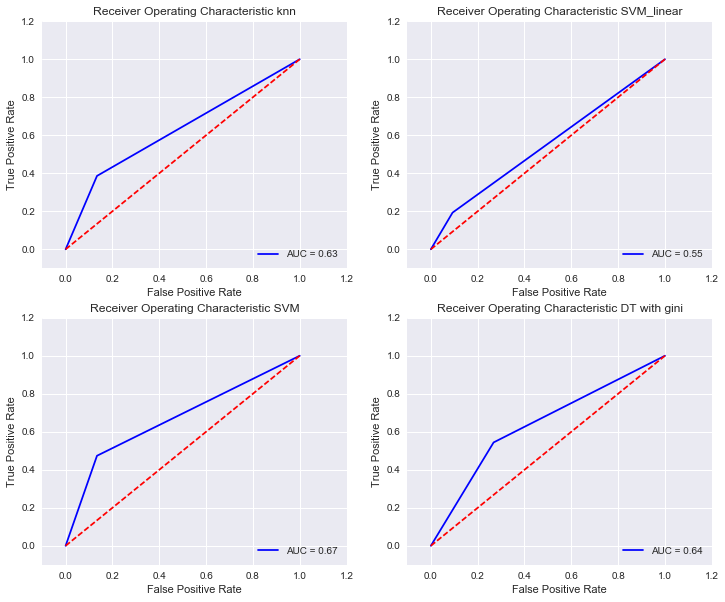

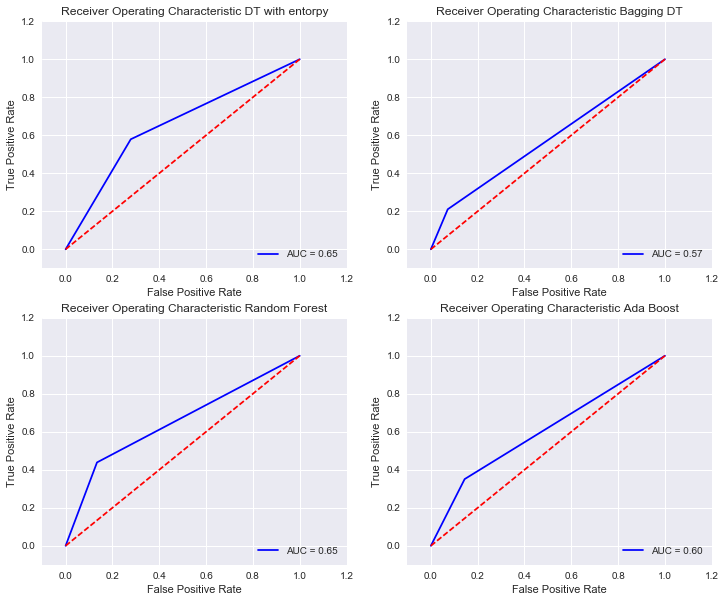

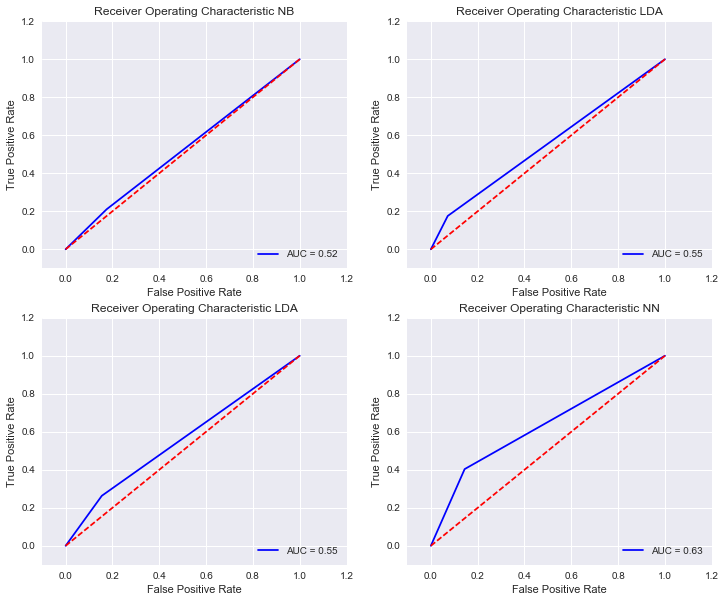

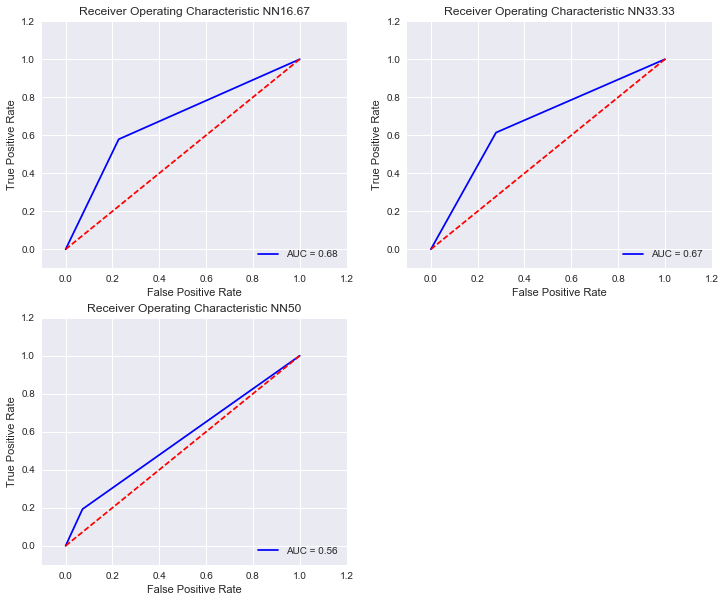

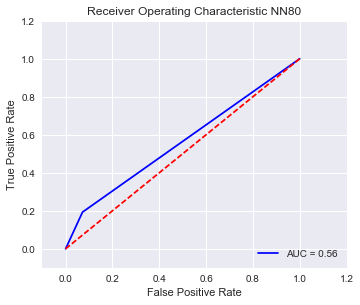

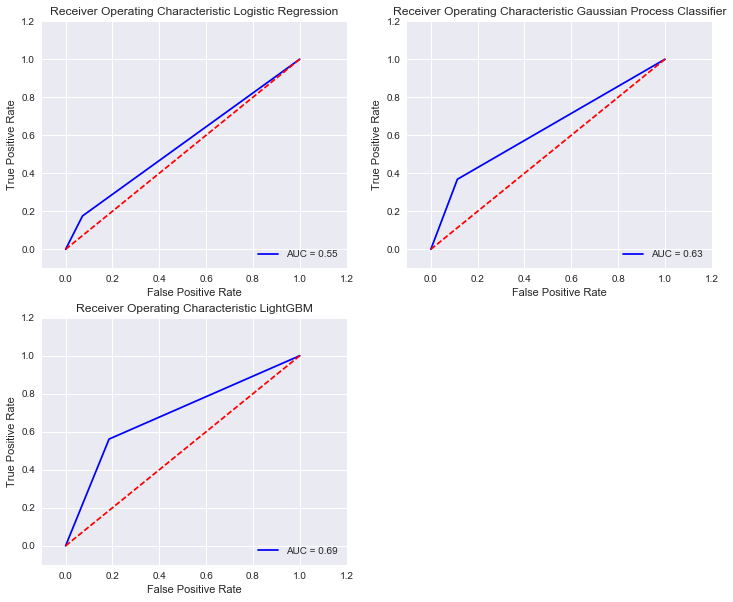

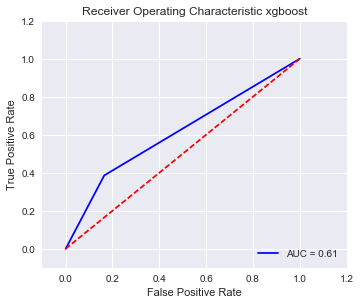

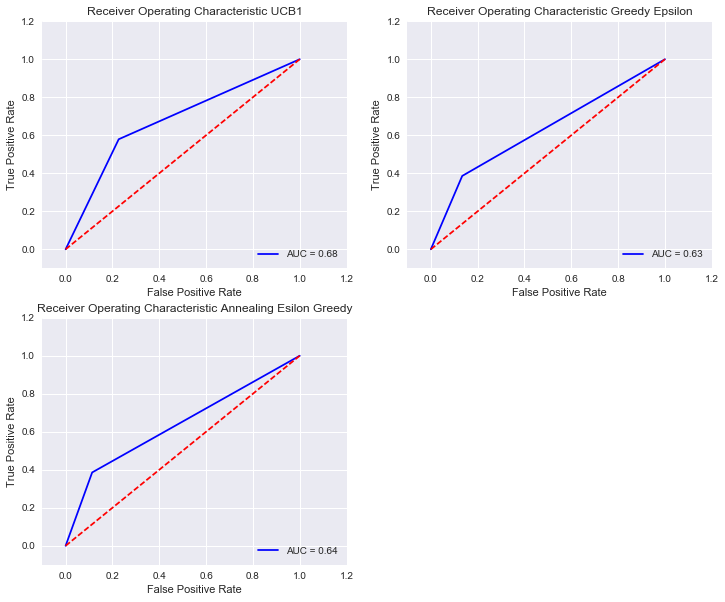

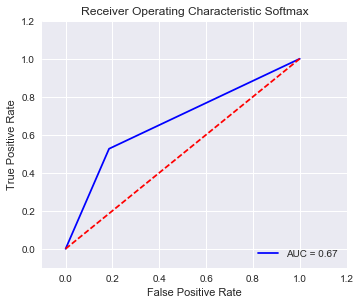

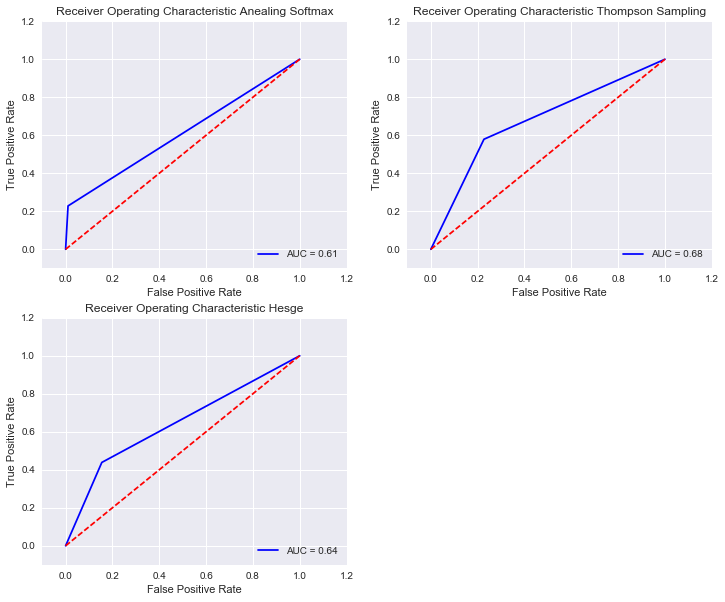

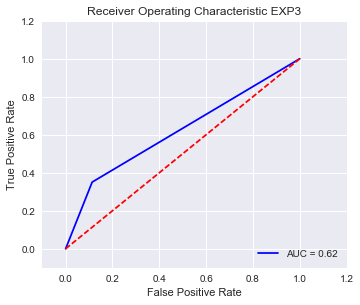

In [19]:
plt.rcParams['figure.figsize'] = (12, 10)
plt.figure(1)
plt.subplot(2,2,1)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_deploy, y_pred_neigh)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic knn')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
###############################################################################
plt.subplot(2,2,2)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_deploy, y_pred_svm_linear)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic SVM_linear')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
##############################################################################
plt.subplot(2,2,3)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_deploy, y_pred_svm)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic SVM')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
###############################################################################
plt.subplot(2,2,4)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_deploy, y_pred_gtgini)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic DT with gini')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
###############################################################################
##############################################################################
plt.figure(2)
plt.subplot(2,2,1)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_deploy, y_pred_dt_IG)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic DT with entorpy')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
################################################################################
plt.subplot(2,2,2)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_deploy, y_pred_dt_BGKN)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic Bagging DT')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
###############################################################################
plt.subplot(2,2,3)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_deploy, y_pred_dt_RF)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic Random Forest')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
###############################################################################
plt.subplot(2,2,4)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_deploy, y_pred_dt_AD)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic Ada Boost')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
###############################################################################
###############################################################################
##############################################################################
plt.figure(3)
plt.subplot(2,2,1)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_deploy, y_pred_NB)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic NB')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
################################################################################
plt.subplot(2,2,2)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_deploy, y_pred_dt_LDA)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic LDA')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
###############################################################################
plt.subplot(2,2,3)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_deploy, y_pred_dt_QDA)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic LDA')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
###############################################################################
plt.subplot(2,2,4)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_deploy, y_pred_NN)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic NN')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
###############################################################################
###############################################################################
plt.figure(4)
plt.subplot(2,2,1)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_deploy, y_pred_NN1)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic NN16.67')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
###############################################################################
plt.subplot(2,2,2)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_deploy, y_pred_NN2)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic NN33.33')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
###############################################################################
plt.subplot(2,2,3)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_deploy, y_pred_NN3)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic NN50')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
###############################################################################
plt.subplot(2,2,4)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_deploy, y_pred_NN4)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic NN80')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


###############################################################################
###############################################################################
plt.figure(5)
plt.subplot(2,2,1)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_deploy, y_pred_LR)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic Logistic Regression')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
###############################################################################
plt.subplot(2,2,2)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_deploy, y_pred_GP)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic Gaussian Process Classifier')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
###############################################################################
plt.subplot(2,2,3)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_deploy, y_pred_gbm)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic LightGBM')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
###############################################################################
plt.subplot(2,2,4)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_deploy, y_pred_xgboost)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic xgboost')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

###############################################################################
###############################################################################
plt.figure(6)
plt.subplot(2,2,1)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_deploy, y_pred_NN1)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic UCB1')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
###############################################################################
plt.subplot(2,2,2)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_deploy, y_pred_EG)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic Greedy Epsilon')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
###############################################################################
plt.subplot(2,2,3)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_deploy, y_pred_AEG)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic Annealing Esilon Greedy')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
###############################################################################
plt.subplot(2,2,4)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_deploy, y_pred_SM)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic Softmax')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


###############################################################################
###############################################################################
plt.figure(7)
plt.subplot(2,2,1)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_deploy, y_pred_ASM)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic Anealing Softmax')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
###############################################################################
plt.subplot(2,2,2)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_deploy, y_pred_TS)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic Thompson Sampling')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
###############################################################################
plt.subplot(2,2,3)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_deploy, y_pred_HG)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic Hesge')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
###############################################################################
plt.subplot(2,2,4)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_deploy, y_pred_EXP)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic EXP3')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()








# Plot the results Comparing to UCB1 three times

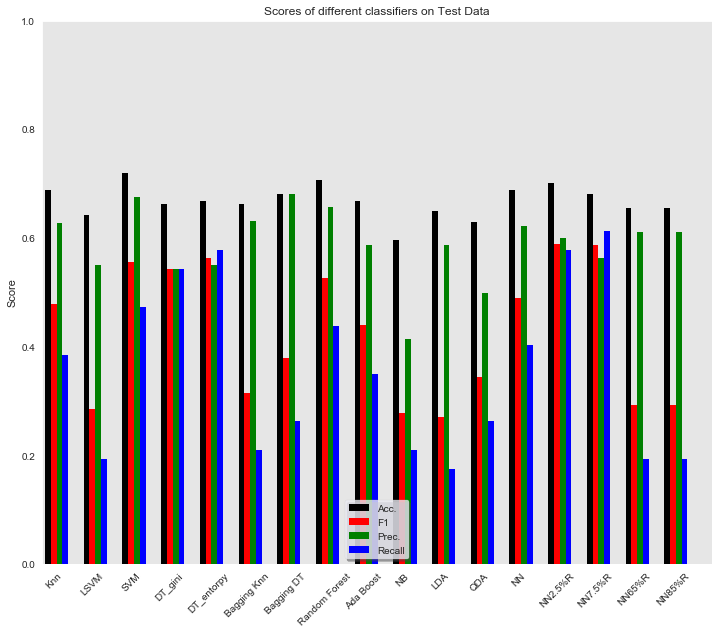

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)
accData = [metrics.accuracy_score(y_deploy, y_pred_neigh),
           metrics.accuracy_score(y_deploy, y_pred_svm_linear), 
           metrics.accuracy_score(y_deploy, y_pred_svm), 
           metrics.accuracy_score(y_deploy, y_pred_gtgini),
           metrics.accuracy_score(y_deploy, y_pred_dt_IG), 
           metrics.accuracy_score(y_deploy, y_pred_dt_BGKN),
           metrics.accuracy_score(y_deploy, y_pred_dt_BGDT), 
           metrics.accuracy_score(y_deploy, y_pred_dt_RF),
           metrics.accuracy_score(y_deploy, y_pred_dt_AD), 
           metrics.accuracy_score(y_deploy, y_pred_NB),
           metrics.accuracy_score(y_deploy, y_pred_dt_LDA), 
           metrics.accuracy_score(y_deploy, y_pred_dt_QDA),
           metrics.accuracy_score(y_deploy, y_pred_NN),
           metrics.accuracy_score(y_deploy, y_pred_NN1),
           metrics.accuracy_score(y_deploy, y_pred_NN2),
           metrics.accuracy_score(y_deploy, y_pred_NN3),
           metrics.accuracy_score(y_deploy, y_pred_NN4)]
PresionData = [metrics.precision_score(y_deploy, y_pred_neigh),
               metrics.precision_score(y_deploy, y_pred_svm_linear),
               metrics.precision_score(y_deploy, y_pred_svm),
               metrics.precision_score(y_deploy, y_pred_gtgini),
               metrics.precision_score(y_deploy, y_pred_dt_IG),
               metrics.precision_score(y_deploy, y_pred_dt_BGKN),
               metrics.precision_score(y_deploy, y_pred_dt_BGDT),
               metrics.precision_score(y_deploy, y_pred_dt_RF),
               metrics.precision_score(y_deploy, y_pred_dt_AD),
               metrics.precision_score(y_deploy, y_pred_NB),
               metrics.precision_score(y_deploy, y_pred_dt_LDA),
               metrics.precision_score(y_deploy, y_pred_dt_QDA),
               metrics.precision_score(y_deploy, y_pred_NN),
               metrics.precision_score(y_deploy, y_pred_NN1),
               metrics.precision_score(y_deploy, y_pred_NN2),
               metrics.precision_score(y_deploy, y_pred_NN3),
               metrics.precision_score(y_deploy, y_pred_NN4)]
RecallData = [ metrics.recall_score(y_deploy, y_pred_neigh),
              metrics.recall_score(y_deploy, y_pred_svm_linear),
              metrics.recall_score(y_deploy, y_pred_svm),
              metrics.recall_score(y_deploy, y_pred_gtgini),
              metrics.recall_score(y_deploy, y_pred_dt_IG),
              metrics.recall_score(y_deploy, y_pred_dt_BGKN),
              metrics.recall_score(y_deploy, y_pred_dt_BGDT),
              metrics.recall_score(y_deploy, y_pred_dt_RF),
              metrics.recall_score(y_deploy, y_pred_dt_AD),
              metrics.recall_score(y_deploy, y_pred_NB),
              metrics.recall_score(y_deploy, y_pred_dt_LDA),
              metrics.recall_score(y_deploy, y_pred_dt_QDA),
              metrics.recall_score(y_deploy, y_pred_NN),
              metrics.recall_score(y_deploy, y_pred_NN1),
              metrics.recall_score(y_deploy, y_pred_NN2),
              metrics.recall_score(y_deploy, y_pred_NN3),
              metrics.recall_score(y_deploy, y_pred_NN4)]
F1Data = [metrics.f1_score(y_deploy, y_pred_neigh),
          metrics.f1_score(y_deploy, y_pred_svm_linear),
          metrics.f1_score(y_deploy, y_pred_svm),
          metrics.f1_score(y_deploy, y_pred_gtgini),
          metrics.f1_score(y_deploy, y_pred_dt_IG),
          metrics.f1_score(y_deploy, y_pred_dt_BGKN),
          metrics.f1_score(y_deploy, y_pred_dt_BGDT),
          metrics.f1_score(y_deploy, y_pred_dt_RF),
          metrics.f1_score(y_deploy, y_pred_dt_AD),
          metrics.f1_score(y_deploy, y_pred_NB),
          metrics.f1_score(y_deploy, y_pred_dt_LDA),
          metrics.f1_score(y_deploy, y_pred_dt_QDA),
          metrics.f1_score(y_deploy, y_pred_NN),
          metrics.f1_score(y_deploy, y_pred_NN1),
          metrics.f1_score(y_deploy, y_pred_NN2),
          metrics.f1_score(y_deploy, y_pred_NN3),
          metrics.f1_score(y_deploy, y_pred_NN4)]
N = len(accData)
## necessary variables
ind = np.arange(N)                # the x locations for the groups
width = 0.15                     # the width of the bars
## the bars
rects1 = ax.bar(ind, accData, width,
                color='black',
                #yerr=menStd,
                error_kw=dict(elinewidth=2,ecolor='red'))
rects2 = ax.bar(ind+width, F1Data, width,
                    color='red',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='black'))
rects3 = ax.bar(ind+width+width, PresionData, width,
                    color='green',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='blue'))
rects4 = ax.bar(ind+width+width+width, RecallData, width,
                    color='blue',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='green'))
# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,1)
ax.set_ylabel('Score')
ax.set_title('Scores of different classifiers on Test Data')
xTickMarks = ['Knn', 'LSVM', 'SVM', 'DT_gini', 'DT_entorpy' ,
              'Bagging Knn' , 'Bagging DT' , 'Random Forest' , 'Ada Boost' ,
              'NB' , 'LDA' , 'QDA' , 'NN', 'NN2.5%R' , 'NN7.5%R' , 'NN65%R' , 'NN85%R']
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontsize=10)



## add a legend
ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0]), ('Acc.', 'F1' , 'Prec.' , 'Recall') , loc=8, fancybox=True, 
          frameon=True, shadow=True)
ax.set_facecolor('0.9')

ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.spines['top'].set_linewidth(0.9)
ax.spines['right'].set_linewidth(0.9)
ax.spines['bottom'].set_linewidth(0.9)
ax.spines['left'].set_linewidth(0.9)
ax.grid(False)
plt.show()

In [21]:
import pandas as pd
from math import pi
from bokeh.charts import Bar, Area, defaults
from bokeh.layouts import row
from bokeh.charts.attributes import cat, color
from bokeh.charts.operations import blend
#from bokeh.charts.utils import df_from_json
from bokeh.plotting import figure, output_notebook, show
############################################################################################################
TOOLS = 'box_zoom,box_select,crosshair,resize,reset,lasso_select,pan,save,poly_select,tap,wheel_zoom,undo'
#defaults.width = 1000
#defaults.height = 800
output_notebook()
df1 = pd.DataFrame({'Matric': xTickMarks,
                    'Accuracy':accData, 
                   'Precision': PresionData, 
                   'Recall': RecallData, 
                    'F1 Score': F1Data})
############################################################################################################
bar = Bar(df1,
          values=blend('Accuracy', 'F1 Score', 'Precision','Recall', name='Scores', labels_name='Score'),
          label=cat(columns='Matric', sort=False),
          stack=cat(columns='Score', sort=False),
          color=color(columns='Score', palette=['SaddleBrown', 'Silver', 'Goldenrod', 'Grey'],
                      sort=False),
          legend='bottom_center', xlabel="List of Models", ylabel="The Scores",
          title="Scores of different Models", 
          tooltips=[('Score', '@Score'), ('Model', '@Matric')],
          tools=TOOLS, plot_width=900, plot_height=800)
bar.title.align = "center"
bar.xaxis.major_label_orientation = pi/2
###############################################################################################################
p = Bar(df1, label='Matric', 
        values = blend('Accuracy', 'F1 Score', 'Precision','Recall', name='Scores', labels_name='Score'),
        group=cat(columns='Score', sort=False),
        title="Scores of different Models", legend='bottom_center',
       tools=TOOLS, plot_width=900, plot_height=600,
       xlabel='List of Models', ylabel='The Scores')
p.title.align = "center"
#p.yaxis.major_label_orientation = "vertical"
p.xaxis.major_label_orientation = pi/2
#########################################################################################################
data = dict(
    Acc = accData,
    Pre = PresionData,
    Rec = RecallData,
    F1 = F1Data,
)
area1 = Area(data, title="The trend of score over Models", legend="bottom_center",
             xlabel='List of Models', ylabel='The Scores',
            tools=TOOLS, plot_width=450, plot_height=300)
area1.title.align = "center"
area2 = Area(data, title="The trend of score over Models", legend="bottom_center",
             stack=True, xlabel='List of Models', ylabel='The Scores',
            tools=TOOLS, plot_width=450, plot_height=300)
area2.title.align = "center"
#########################################################################################################
show(bar)
show(p)
#show(area1)
#show(area2)
show(row(area1, area2))

Loading BokehJS ...

## Compare All the results

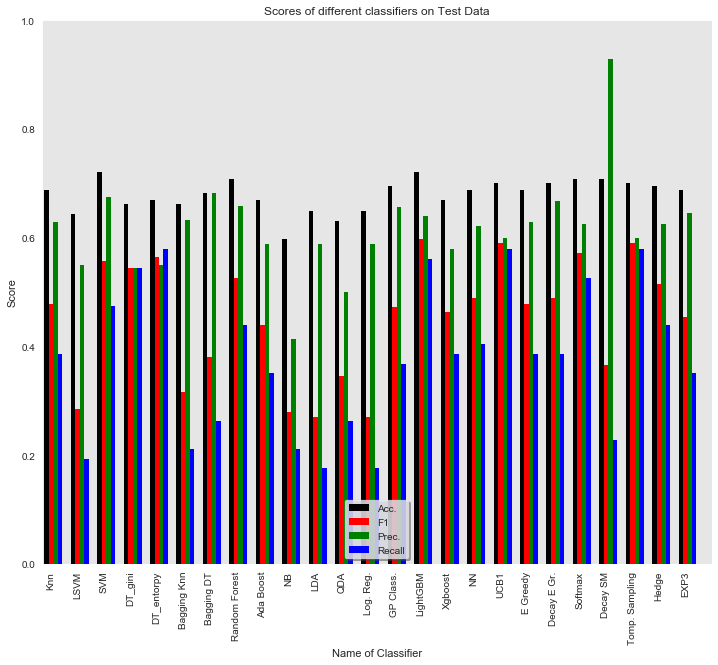

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
accData = [metrics.accuracy_score(y_deploy, y_pred_neigh),
           metrics.accuracy_score(y_deploy, y_pred_svm_linear), 
           metrics.accuracy_score(y_deploy, y_pred_svm), 
           metrics.accuracy_score(y_deploy, y_pred_gtgini),
           metrics.accuracy_score(y_deploy, y_pred_dt_IG), 
           metrics.accuracy_score(y_deploy, y_pred_dt_BGKN),
           metrics.accuracy_score(y_deploy, y_pred_dt_BGDT), 
           metrics.accuracy_score(y_deploy, y_pred_dt_RF),
           metrics.accuracy_score(y_deploy, y_pred_dt_AD), 
           metrics.accuracy_score(y_deploy, y_pred_NB),
           metrics.accuracy_score(y_deploy, y_pred_dt_LDA), 
           metrics.accuracy_score(y_deploy, y_pred_dt_QDA),           
           metrics.accuracy_score(y_deploy, y_pred_LR),
           metrics.accuracy_score(y_deploy, y_pred_GP),
           metrics.accuracy_score(y_deploy, y_pred_gbm),
           metrics.accuracy_score(y_deploy, y_pred_xgboost),
           metrics.accuracy_score(y_deploy, y_pred_NN),        
           metrics.accuracy_score(y_deploy, y_pred_NN1),
           metrics.accuracy_score(y_deploy, y_pred_EG),
           metrics.accuracy_score(y_deploy, y_pred_AEG),
           metrics.accuracy_score(y_deploy, y_pred_SM),
           metrics.accuracy_score(y_deploy, y_pred_ASM),
           metrics.accuracy_score(y_deploy, y_pred_TS),
           metrics.accuracy_score(y_deploy, y_pred_HG),
           metrics.accuracy_score(y_deploy, y_pred_EXP)]
          
PresionData = [metrics.precision_score(y_deploy, y_pred_neigh),
               metrics.precision_score(y_deploy, y_pred_svm_linear),
               metrics.precision_score(y_deploy, y_pred_svm),
               metrics.precision_score(y_deploy, y_pred_gtgini),
               metrics.precision_score(y_deploy, y_pred_dt_IG),
               metrics.precision_score(y_deploy, y_pred_dt_BGKN),
               metrics.precision_score(y_deploy, y_pred_dt_BGDT),
               metrics.precision_score(y_deploy, y_pred_dt_RF),
               metrics.precision_score(y_deploy, y_pred_dt_AD),
               metrics.precision_score(y_deploy, y_pred_NB),
               metrics.precision_score(y_deploy, y_pred_dt_LDA),
               metrics.precision_score(y_deploy, y_pred_dt_QDA),              
               metrics.precision_score(y_deploy, y_pred_LR),
               metrics.precision_score(y_deploy, y_pred_GP),
               metrics.precision_score(y_deploy, y_pred_gbm),
               metrics.precision_score(y_deploy, y_pred_xgboost),
               metrics.precision_score(y_deploy, y_pred_NN),
               metrics.precision_score(y_deploy, y_pred_NN1),
               metrics.precision_score(y_deploy, y_pred_EG),
               metrics.precision_score(y_deploy, y_pred_AEG),
               metrics.precision_score(y_deploy, y_pred_SM),
               metrics.precision_score(y_deploy, y_pred_ASM),
               metrics.precision_score(y_deploy, y_pred_TS),
               metrics.precision_score(y_deploy, y_pred_HG),
               metrics.precision_score(y_deploy, y_pred_EXP)]
RecallData = [ metrics.recall_score(y_deploy, y_pred_neigh),
              metrics.recall_score(y_deploy, y_pred_svm_linear),
              metrics.recall_score(y_deploy, y_pred_svm),
              metrics.recall_score(y_deploy, y_pred_gtgini),
              metrics.recall_score(y_deploy, y_pred_dt_IG),
              metrics.recall_score(y_deploy, y_pred_dt_BGKN),
              metrics.recall_score(y_deploy, y_pred_dt_BGDT),
              metrics.recall_score(y_deploy, y_pred_dt_RF),
              metrics.recall_score(y_deploy, y_pred_dt_AD),
              metrics.recall_score(y_deploy, y_pred_NB),
              metrics.recall_score(y_deploy, y_pred_dt_LDA),
              metrics.recall_score(y_deploy, y_pred_dt_QDA),
              metrics.recall_score(y_deploy, y_pred_LR),
              metrics.recall_score(y_deploy, y_pred_GP),
              metrics.recall_score(y_deploy, y_pred_gbm),
              metrics.recall_score(y_deploy, y_pred_xgboost),       
              metrics.recall_score(y_deploy, y_pred_NN),
              metrics.recall_score(y_deploy, y_pred_NN1),
              metrics.recall_score(y_deploy, y_pred_AEG),
              metrics.recall_score(y_deploy, y_pred_EG),
              metrics.recall_score(y_deploy, y_pred_SM),
              metrics.recall_score(y_deploy, y_pred_ASM),
              metrics.recall_score(y_deploy, y_pred_TS),
              metrics.recall_score(y_deploy, y_pred_HG),
              metrics.recall_score(y_deploy, y_pred_EXP)]
F1Data = [metrics.f1_score(y_deploy, y_pred_neigh),
          metrics.f1_score(y_deploy, y_pred_svm_linear),
          metrics.f1_score(y_deploy, y_pred_svm),
          metrics.f1_score(y_deploy, y_pred_gtgini),
          metrics.f1_score(y_deploy, y_pred_dt_IG),
          metrics.f1_score(y_deploy, y_pred_dt_BGKN),
          metrics.f1_score(y_deploy, y_pred_dt_BGDT),
          metrics.f1_score(y_deploy, y_pred_dt_RF),
          metrics.f1_score(y_deploy, y_pred_dt_AD),
          metrics.f1_score(y_deploy, y_pred_NB),
          metrics.f1_score(y_deploy, y_pred_dt_LDA),
          metrics.f1_score(y_deploy, y_pred_dt_QDA),         
          metrics.f1_score(y_deploy, y_pred_LR),
          metrics.f1_score(y_deploy, y_pred_GP),
          metrics.f1_score(y_deploy, y_pred_gbm),
          metrics.f1_score(y_deploy, y_pred_xgboost),
          metrics.f1_score(y_deploy, y_pred_NN),                             
          metrics.f1_score(y_deploy, y_pred_NN1),
          metrics.f1_score(y_deploy, y_pred_EG),
          metrics.f1_score(y_deploy, y_pred_AEG),
          metrics.f1_score(y_deploy, y_pred_SM),
          metrics.f1_score(y_deploy, y_pred_ASM),
          metrics.f1_score(y_deploy, y_pred_TS),
          metrics.f1_score(y_deploy, y_pred_HG),
          metrics.f1_score(y_deploy, y_pred_EXP)]         



N = len(accData)
## necessary variables
ind = np.arange(N)                # the x locations for the groups
width = 0.17                     # the width of the bars
## the bars
rects1 = ax.bar(ind, accData, width,
                color='black',
                #yerr=menStd,
                error_kw=dict(elinewidth=2,ecolor='red'))
rects2 = ax.bar(ind+width, F1Data, width,
                    color='red',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='black'))
rects3 = ax.bar(ind+width+width, PresionData, width,
                    color='green',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='blue'))
rects4 = ax.bar(ind+width+width+width, RecallData, width,
                    color='blue',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='green'))
# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,1)
ax.set_ylabel('Score')
ax.set_xlabel('Name of Classifier')
ax.set_title('Scores of different classifiers on Test Data')
xTickMarks = ['Knn', 'LSVM', 'SVM', 'DT_gini', 'DT_entorpy' ,
              'Bagging Knn' , 'Bagging DT' , 'Random Forest' , 'Ada Boost' ,
              'NB' , 'LDA' , 'QDA' ,'Log. Reg.' ,'GP Class.','LightGBM','Xgboost',
              'NN', 'UCB1' , 'E Greedy' , 'Decay E Gr.' , 'Softmax', 'Decay SM',
               'Tomp. Sampling', 'Hedge', 'EXP3']
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=90, fontsize=10)
## add a legend
ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0]), ('Acc.', 'F1' , 'Prec.' , 'Recall') , loc=8, fancybox=True, 
          frameon=True, shadow=True)
ax.set_facecolor('0.9')

ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.spines['top'].set_linewidth(0.9)
ax.spines['right'].set_linewidth(0.9)
ax.spines['bottom'].set_linewidth(0.9)
ax.spines['left'].set_linewidth(0.9)
ax.grid(False)
plt.show()

In [23]:

df1 = pd.DataFrame({'Matric': xTickMarks,
                    'Accuracy':accData, 
                   'Precision': PresionData, 
                   'Recall': RecallData, 
                    'F1 Score': F1Data})
############################################################################################################
bar = Bar(df1,
          values=blend('Accuracy', 'F1 Score', 'Precision','Recall', name='Scores', labels_name='Score'),
          label=cat(columns='Matric', sort=False),
          stack=cat(columns='Score', sort=False),
          color=color(columns='Score', palette=['SaddleBrown', 'Silver', 'Goldenrod', 'Grey'],
                      sort=False),
          legend='bottom_center', xlabel="List of Models", ylabel="The Scores",
          title="Scores of different Models", 
          tooltips=[('Score', '@Score'), ('Model', '@Matric')],
          tools=TOOLS, plot_width=900, plot_height=800)
bar.title.align = "center"
bar.xaxis.major_label_orientation = pi/2
###############################################################################################################
p = Bar(df1, label='Matric', 
        values = blend('Accuracy', 'F1 Score', 'Precision','Recall', name='Scores', labels_name='Score'),
        group=cat(columns='Score', sort=False),
        title="Scores of different Models", legend='bottom_center',
       tools=TOOLS, plot_width=900, plot_height=600,
       xlabel='List of Models', ylabel='The Scores')
p.title.align = "center"
#p.yaxis.major_label_orientation = "vertical"
p.xaxis.major_label_orientation = pi/2
#########################################################################################################
data = dict(
    Acc = accData,
    Pre = PresionData,
    Rec = RecallData,
    F1 = F1Data,
)
area1 = Area(data, title="The trend of score over Models", legend="bottom_center",
             xlabel='List of Models', ylabel='The Scores',
            tools=TOOLS, plot_width=450, plot_height=300)
area1.title.align = "center"
area2 = Area(data, title="The trend of score over Models", legend="bottom_center",
             stack=True, xlabel='List of Models', ylabel='The Scores',
            tools=TOOLS, plot_width=450, plot_height=300)
area2.title.align = "center"
#########################################################################################################
show(bar)
show(p)
#show(area1)
#show(area2)
show(row(area1, area2))

Loading BokehJS ...

In [ ]:
df1.to_csv('pima.csv')

## Compare UCB1

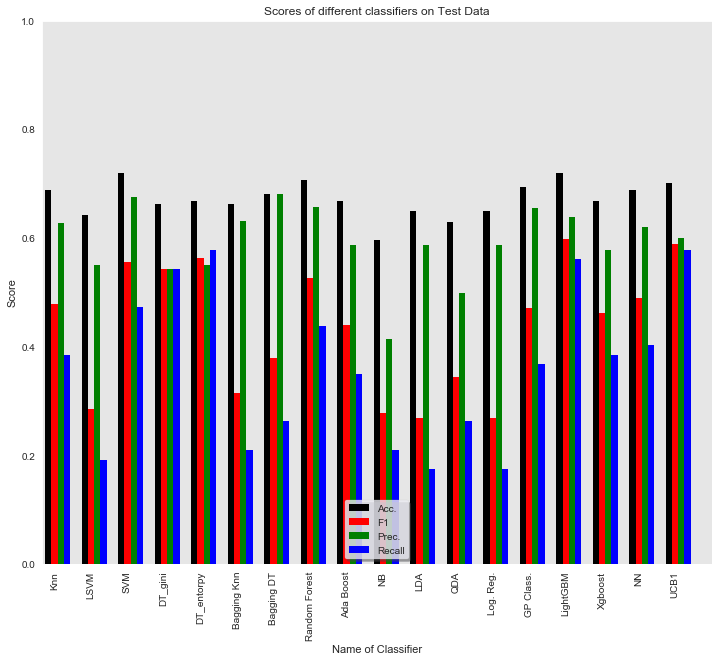

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)
accData = [metrics.accuracy_score(y_deploy, y_pred_neigh),
           metrics.accuracy_score(y_deploy, y_pred_svm_linear), 
           metrics.accuracy_score(y_deploy, y_pred_svm), 
           metrics.accuracy_score(y_deploy, y_pred_gtgini),
           metrics.accuracy_score(y_deploy, y_pred_dt_IG), 
           metrics.accuracy_score(y_deploy, y_pred_dt_BGKN),
           metrics.accuracy_score(y_deploy, y_pred_dt_BGDT), 
           metrics.accuracy_score(y_deploy, y_pred_dt_RF),
           metrics.accuracy_score(y_deploy, y_pred_dt_AD), 
           metrics.accuracy_score(y_deploy, y_pred_NB),
           metrics.accuracy_score(y_deploy, y_pred_dt_LDA), 
           metrics.accuracy_score(y_deploy, y_pred_dt_QDA),           
           metrics.accuracy_score(y_deploy, y_pred_LR),
           metrics.accuracy_score(y_deploy, y_pred_GP),
           metrics.accuracy_score(y_deploy, y_pred_gbm),
           metrics.accuracy_score(y_deploy, y_pred_xgboost),
           metrics.accuracy_score(y_deploy, y_pred_NN),        
           metrics.accuracy_score(y_deploy, y_pred_NN1)]
          
PresionData = [metrics.precision_score(y_deploy, y_pred_neigh),
               metrics.precision_score(y_deploy, y_pred_svm_linear),
               metrics.precision_score(y_deploy, y_pred_svm),
               metrics.precision_score(y_deploy, y_pred_gtgini),
               metrics.precision_score(y_deploy, y_pred_dt_IG),
               metrics.precision_score(y_deploy, y_pred_dt_BGKN),
               metrics.precision_score(y_deploy, y_pred_dt_BGDT),
               metrics.precision_score(y_deploy, y_pred_dt_RF),
               metrics.precision_score(y_deploy, y_pred_dt_AD),
               metrics.precision_score(y_deploy, y_pred_NB),
               metrics.precision_score(y_deploy, y_pred_dt_LDA),
               metrics.precision_score(y_deploy, y_pred_dt_QDA),              
               metrics.precision_score(y_deploy, y_pred_LR),
               metrics.precision_score(y_deploy, y_pred_GP),
               metrics.precision_score(y_deploy, y_pred_gbm),
               metrics.precision_score(y_deploy, y_pred_xgboost),
               metrics.precision_score(y_deploy, y_pred_NN),
               metrics.precision_score(y_deploy, y_pred_NN1)]

RecallData = [ metrics.recall_score(y_deploy, y_pred_neigh),
              metrics.recall_score(y_deploy, y_pred_svm_linear),
              metrics.recall_score(y_deploy, y_pred_svm),
              metrics.recall_score(y_deploy, y_pred_gtgini),
              metrics.recall_score(y_deploy, y_pred_dt_IG),
              metrics.recall_score(y_deploy, y_pred_dt_BGKN),
              metrics.recall_score(y_deploy, y_pred_dt_BGDT),
              metrics.recall_score(y_deploy, y_pred_dt_RF),
              metrics.recall_score(y_deploy, y_pred_dt_AD),
              metrics.recall_score(y_deploy, y_pred_NB),
              metrics.recall_score(y_deploy, y_pred_dt_LDA),
              metrics.recall_score(y_deploy, y_pred_dt_QDA),
              metrics.recall_score(y_deploy, y_pred_LR),
              metrics.recall_score(y_deploy, y_pred_GP),
              metrics.recall_score(y_deploy, y_pred_gbm),
              metrics.recall_score(y_deploy, y_pred_xgboost),       
              metrics.recall_score(y_deploy, y_pred_NN),
              metrics.recall_score(y_deploy, y_pred_NN1)]

F1Data = [metrics.f1_score(y_deploy, y_pred_neigh),
          metrics.f1_score(y_deploy, y_pred_svm_linear),
          metrics.f1_score(y_deploy, y_pred_svm),
          metrics.f1_score(y_deploy, y_pred_gtgini),
          metrics.f1_score(y_deploy, y_pred_dt_IG),
          metrics.f1_score(y_deploy, y_pred_dt_BGKN),
          metrics.f1_score(y_deploy, y_pred_dt_BGDT),
          metrics.f1_score(y_deploy, y_pred_dt_RF),
          metrics.f1_score(y_deploy, y_pred_dt_AD),
          metrics.f1_score(y_deploy, y_pred_NB),
          metrics.f1_score(y_deploy, y_pred_dt_LDA),
          metrics.f1_score(y_deploy, y_pred_dt_QDA),         
          metrics.f1_score(y_deploy, y_pred_LR),
          metrics.f1_score(y_deploy, y_pred_GP),
          metrics.f1_score(y_deploy, y_pred_gbm),
          metrics.f1_score(y_deploy, y_pred_xgboost),
          metrics.f1_score(y_deploy, y_pred_NN),                             
          metrics.f1_score(y_deploy, y_pred_NN1)]         



N = len(accData)
## necessary variables
ind = np.arange(N)                # the x locations for the groups
width = 0.17                     # the width of the bars
## the bars
rects1 = ax.bar(ind, accData, width,
                color='black',
                #yerr=menStd,
                error_kw=dict(elinewidth=2,ecolor='red'))
rects2 = ax.bar(ind+width, F1Data, width,
                    color='red',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='black'))
rects3 = ax.bar(ind+width+width, PresionData, width,
                    color='green',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='blue'))
rects4 = ax.bar(ind+width+width+width, RecallData, width,
                    color='blue',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='green'))
# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,1)
ax.set_ylabel('Score')
ax.set_xlabel('Name of Classifier')
ax.set_title('Scores of different classifiers on Test Data')
xTickMarks = ['Knn', 'LSVM', 'SVM', 'DT_gini', 'DT_entorpy' ,
              'Bagging Knn' , 'Bagging DT' , 'Random Forest' , 'Ada Boost' ,
              'NB' , 'LDA' , 'QDA' ,'Log. Reg.' ,'GP Class.','LightGBM','Xgboost',
              'NN', 'UCB1']
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=90, fontsize=10)
## add a legend
ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0]), ('Acc.', 'F1' , 'Prec.' , 'Recall') , loc=8, fancybox=True, 
          frameon=True, shadow=True)
ax.set_facecolor('0.9')

ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.spines['top'].set_linewidth(0.9)
ax.spines['right'].set_linewidth(0.9)
ax.spines['bottom'].set_linewidth(0.9)
ax.spines['left'].set_linewidth(0.9)
ax.grid(False)
plt.show()

In [25]:

df1 = pd.DataFrame({'Matric': xTickMarks,
                    'Accuracy':accData, 
                   'Precision': PresionData, 
                   'Recall': RecallData, 
                    'F1 Score': F1Data})
############################################################################################################
bar = Bar(df1,
          values=blend('Accuracy', 'F1 Score', 'Precision','Recall', name='Scores', labels_name='Score'),
          label=cat(columns='Matric', sort=False),
          stack=cat(columns='Score', sort=False),
          color=color(columns='Score', palette=['SaddleBrown', 'Silver', 'Goldenrod', 'Grey'],
                      sort=False),
          legend='bottom_center', xlabel="List of Models", ylabel="The Scores",
          title="Scores of different Models", 
          tooltips=[('Score', '@Score'), ('Model', '@Matric')],
          tools=TOOLS, plot_width=900, plot_height=800)
bar.title.align = "center"
bar.xaxis.major_label_orientation = pi/2
###############################################################################################################
p = Bar(df1, label='Matric', 
        values = blend('Accuracy', 'F1 Score', 'Precision','Recall', name='Scores', labels_name='Score'),
        group=cat(columns='Score', sort=False),
        title="Scores of different Models", legend='bottom_center',
       tools=TOOLS, plot_width=900, plot_height=600,
       xlabel='List of Models', ylabel='The Scores')
p.title.align = "center"
#p.yaxis.major_label_orientation = "vertical"
p.xaxis.major_label_orientation = pi/2
#########################################################################################################
data = dict(
    Acc = accData,
    Pre = PresionData,
    Rec = RecallData,
    F1 = F1Data,
)
area1 = Area(data, title="The trend of score over Models", legend="bottom_center",
             xlabel='List of Models', ylabel='The Scores',
            tools=TOOLS, plot_width=450, plot_height=300)
area1.title.align = "center"
area2 = Area(data, title="The trend of score over Models", legend="bottom_center",
             stack=True, xlabel='List of Models', ylabel='The Scores',
            tools=TOOLS, plot_width=450, plot_height=300)
area2.title.align = "center"
#########################################################################################################
show(bar)
show(p)
#show(area1)
#show(area2)
show(row(area1, area2))

Loading BokehJS ...

## Compare Epsilon greedy

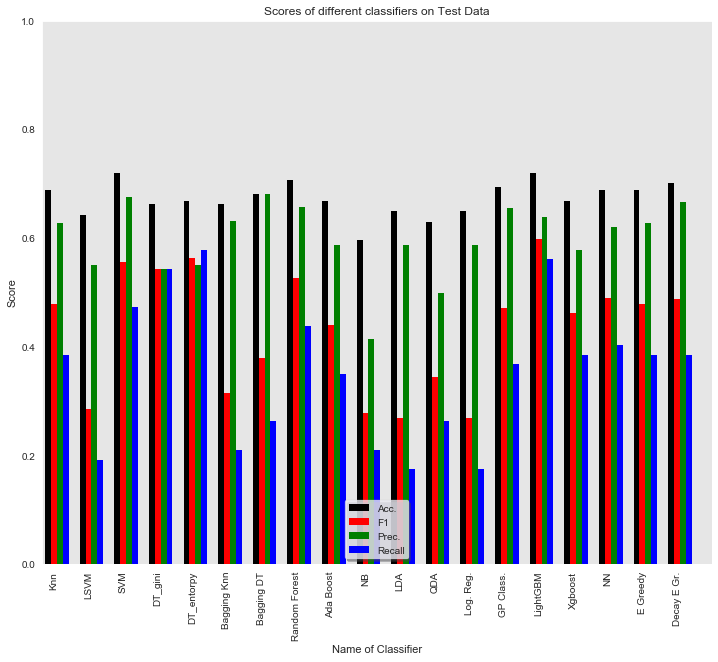

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
accData = [metrics.accuracy_score(y_deploy, y_pred_neigh),
           metrics.accuracy_score(y_deploy, y_pred_svm_linear), 
           metrics.accuracy_score(y_deploy, y_pred_svm), 
           metrics.accuracy_score(y_deploy, y_pred_gtgini),
           metrics.accuracy_score(y_deploy, y_pred_dt_IG), 
           metrics.accuracy_score(y_deploy, y_pred_dt_BGKN),
           metrics.accuracy_score(y_deploy, y_pred_dt_BGDT), 
           metrics.accuracy_score(y_deploy, y_pred_dt_RF),
           metrics.accuracy_score(y_deploy, y_pred_dt_AD), 
           metrics.accuracy_score(y_deploy, y_pred_NB),
           metrics.accuracy_score(y_deploy, y_pred_dt_LDA), 
           metrics.accuracy_score(y_deploy, y_pred_dt_QDA),           
           metrics.accuracy_score(y_deploy, y_pred_LR),
           metrics.accuracy_score(y_deploy, y_pred_GP),
           metrics.accuracy_score(y_deploy, y_pred_gbm),
           metrics.accuracy_score(y_deploy, y_pred_xgboost),
           metrics.accuracy_score(y_deploy, y_pred_NN),        
           metrics.accuracy_score(y_deploy, y_pred_EG),
           metrics.accuracy_score(y_deploy, y_pred_AEG)]
          
PresionData = [metrics.precision_score(y_deploy, y_pred_neigh),
               metrics.precision_score(y_deploy, y_pred_svm_linear),
               metrics.precision_score(y_deploy, y_pred_svm),
               metrics.precision_score(y_deploy, y_pred_gtgini),
               metrics.precision_score(y_deploy, y_pred_dt_IG),
               metrics.precision_score(y_deploy, y_pred_dt_BGKN),
               metrics.precision_score(y_deploy, y_pred_dt_BGDT),
               metrics.precision_score(y_deploy, y_pred_dt_RF),
               metrics.precision_score(y_deploy, y_pred_dt_AD),
               metrics.precision_score(y_deploy, y_pred_NB),
               metrics.precision_score(y_deploy, y_pred_dt_LDA),
               metrics.precision_score(y_deploy, y_pred_dt_QDA),              
               metrics.precision_score(y_deploy, y_pred_LR),
               metrics.precision_score(y_deploy, y_pred_GP),
               metrics.precision_score(y_deploy, y_pred_gbm),
               metrics.precision_score(y_deploy, y_pred_xgboost),
               metrics.precision_score(y_deploy, y_pred_NN),
               metrics.precision_score(y_deploy, y_pred_EG),
               metrics.precision_score(y_deploy, y_pred_AEG)]

RecallData = [ metrics.recall_score(y_deploy, y_pred_neigh),
              metrics.recall_score(y_deploy, y_pred_svm_linear),
              metrics.recall_score(y_deploy, y_pred_svm),
              metrics.recall_score(y_deploy, y_pred_gtgini),
              metrics.recall_score(y_deploy, y_pred_dt_IG),
              metrics.recall_score(y_deploy, y_pred_dt_BGKN),
              metrics.recall_score(y_deploy, y_pred_dt_BGDT),
              metrics.recall_score(y_deploy, y_pred_dt_RF),
              metrics.recall_score(y_deploy, y_pred_dt_AD),
              metrics.recall_score(y_deploy, y_pred_NB),
              metrics.recall_score(y_deploy, y_pred_dt_LDA),
              metrics.recall_score(y_deploy, y_pred_dt_QDA),
              metrics.recall_score(y_deploy, y_pred_LR),
              metrics.recall_score(y_deploy, y_pred_GP),
              metrics.recall_score(y_deploy, y_pred_gbm),
              metrics.recall_score(y_deploy, y_pred_xgboost),       
              metrics.recall_score(y_deploy, y_pred_NN),
              metrics.recall_score(y_deploy, y_pred_AEG),
              metrics.recall_score(y_deploy, y_pred_EG)]

F1Data = [metrics.f1_score(y_deploy, y_pred_neigh),
          metrics.f1_score(y_deploy, y_pred_svm_linear),
          metrics.f1_score(y_deploy, y_pred_svm),
          metrics.f1_score(y_deploy, y_pred_gtgini),
          metrics.f1_score(y_deploy, y_pred_dt_IG),
          metrics.f1_score(y_deploy, y_pred_dt_BGKN),
          metrics.f1_score(y_deploy, y_pred_dt_BGDT),
          metrics.f1_score(y_deploy, y_pred_dt_RF),
          metrics.f1_score(y_deploy, y_pred_dt_AD),
          metrics.f1_score(y_deploy, y_pred_NB),
          metrics.f1_score(y_deploy, y_pred_dt_LDA),
          metrics.f1_score(y_deploy, y_pred_dt_QDA),         
          metrics.f1_score(y_deploy, y_pred_LR),
          metrics.f1_score(y_deploy, y_pred_GP),
          metrics.f1_score(y_deploy, y_pred_gbm),
          metrics.f1_score(y_deploy, y_pred_xgboost),
          metrics.f1_score(y_deploy, y_pred_NN),                             
          metrics.f1_score(y_deploy, y_pred_EG),
          metrics.f1_score(y_deploy, y_pred_AEG)]         



N = len(accData)
## necessary variables
ind = np.arange(N)                # the x locations for the groups
width = 0.17                     # the width of the bars
## the bars
rects1 = ax.bar(ind, accData, width,
                color='black',
                #yerr=menStd,
                error_kw=dict(elinewidth=2,ecolor='red'))
rects2 = ax.bar(ind+width, F1Data, width,
                    color='red',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='black'))
rects3 = ax.bar(ind+width+width, PresionData, width,
                    color='green',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='blue'))
rects4 = ax.bar(ind+width+width+width, RecallData, width,
                    color='blue',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='green'))
# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,1)
ax.set_ylabel('Score')
ax.set_xlabel('Name of Classifier')
ax.set_title('Scores of different classifiers on Test Data')
xTickMarks = ['Knn', 'LSVM', 'SVM', 'DT_gini', 'DT_entorpy' ,
              'Bagging Knn' , 'Bagging DT' , 'Random Forest' , 'Ada Boost' ,
              'NB' , 'LDA' , 'QDA' ,'Log. Reg.' ,'GP Class.','LightGBM','Xgboost',
              'NN',  'E Greedy' , 'Decay E Gr.' ]
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=90, fontsize=10)
## add a legend
ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0]), ('Acc.', 'F1' , 'Prec.' , 'Recall') , loc=8, fancybox=True, 
          frameon=True, shadow=True)
ax.set_facecolor('0.9')

ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.spines['top'].set_linewidth(0.9)
ax.spines['right'].set_linewidth(0.9)
ax.spines['bottom'].set_linewidth(0.9)
ax.spines['left'].set_linewidth(0.9)
ax.grid(False)
plt.show()

In [27]:

df1 = pd.DataFrame({'Matric': xTickMarks,
                    'Accuracy':accData, 
                   'Precision': PresionData, 
                   'Recall': RecallData, 
                    'F1 Score': F1Data})
############################################################################################################
bar = Bar(df1,
          values=blend('Accuracy', 'F1 Score', 'Precision','Recall', name='Scores', labels_name='Score'),
          label=cat(columns='Matric', sort=False),
          stack=cat(columns='Score', sort=False),
          color=color(columns='Score', palette=['SaddleBrown', 'Silver', 'Goldenrod', 'Grey'],
                      sort=False),
          legend='bottom_center', xlabel="List of Models", ylabel="The Scores",
          title="Scores of different Models", 
          tooltips=[('Score', '@Score'), ('Model', '@Matric')],
          tools=TOOLS, plot_width=900, plot_height=800)
bar.title.align = "center"
bar.xaxis.major_label_orientation = pi/2
###############################################################################################################
p = Bar(df1, label='Matric', 
        values = blend('Accuracy', 'F1 Score', 'Precision','Recall', name='Scores', labels_name='Score'),
        group=cat(columns='Score', sort=False),
        title="Scores of different Models", legend='bottom_center',
       tools=TOOLS, plot_width=900, plot_height=600,
       xlabel='List of Models', ylabel='The Scores')
p.title.align = "center"
#p.yaxis.major_label_orientation = "vertical"
p.xaxis.major_label_orientation = pi/2
#########################################################################################################
data = dict(
    Acc = accData,
    Pre = PresionData,
    Rec = RecallData,
    F1 = F1Data,
)
area1 = Area(data, title="The trend of score over Models", legend="bottom_center",
             xlabel='List of Models', ylabel='The Scores',
            tools=TOOLS, plot_width=450, plot_height=300)
area1.title.align = "center"
area2 = Area(data, title="The trend of score over Models", legend="bottom_center",
             stack=True, xlabel='List of Models', ylabel='The Scores',
            tools=TOOLS, plot_width=450, plot_height=300)
area2.title.align = "center"
#########################################################################################################
show(bar)
show(p)
#show(area1)
#show(area2)
show(row(area1, area2))

Loading BokehJS ...

## Compare Softmax

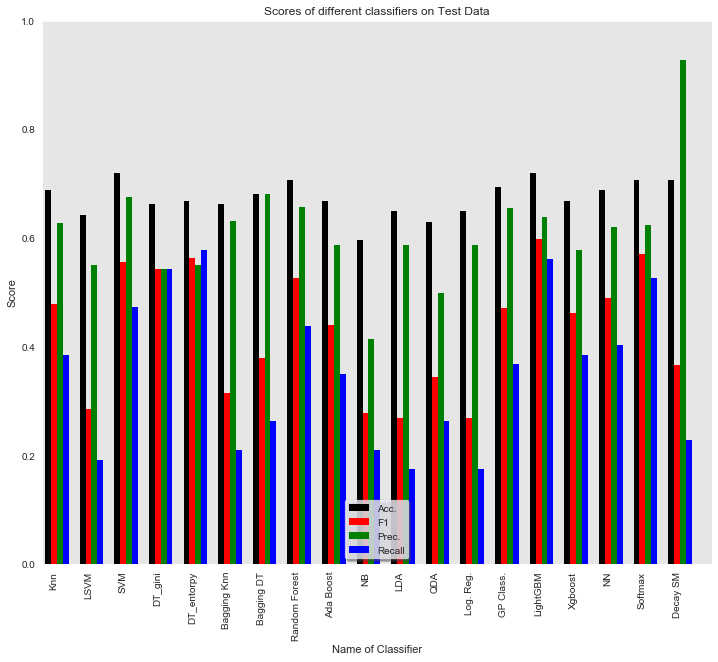

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)
accData = [metrics.accuracy_score(y_deploy, y_pred_neigh),
           metrics.accuracy_score(y_deploy, y_pred_svm_linear), 
           metrics.accuracy_score(y_deploy, y_pred_svm), 
           metrics.accuracy_score(y_deploy, y_pred_gtgini),
           metrics.accuracy_score(y_deploy, y_pred_dt_IG), 
           metrics.accuracy_score(y_deploy, y_pred_dt_BGKN),
           metrics.accuracy_score(y_deploy, y_pred_dt_BGDT), 
           metrics.accuracy_score(y_deploy, y_pred_dt_RF),
           metrics.accuracy_score(y_deploy, y_pred_dt_AD), 
           metrics.accuracy_score(y_deploy, y_pred_NB),
           metrics.accuracy_score(y_deploy, y_pred_dt_LDA), 
           metrics.accuracy_score(y_deploy, y_pred_dt_QDA),           
           metrics.accuracy_score(y_deploy, y_pred_LR),
           metrics.accuracy_score(y_deploy, y_pred_GP),
           metrics.accuracy_score(y_deploy, y_pred_gbm),
           metrics.accuracy_score(y_deploy, y_pred_xgboost),
           metrics.accuracy_score(y_deploy, y_pred_NN),        
           metrics.accuracy_score(y_deploy, y_pred_SM),
           metrics.accuracy_score(y_deploy, y_pred_ASM)]
          
PresionData = [metrics.precision_score(y_deploy, y_pred_neigh),
               metrics.precision_score(y_deploy, y_pred_svm_linear),
               metrics.precision_score(y_deploy, y_pred_svm),
               metrics.precision_score(y_deploy, y_pred_gtgini),
               metrics.precision_score(y_deploy, y_pred_dt_IG),
               metrics.precision_score(y_deploy, y_pred_dt_BGKN),
               metrics.precision_score(y_deploy, y_pred_dt_BGDT),
               metrics.precision_score(y_deploy, y_pred_dt_RF),
               metrics.precision_score(y_deploy, y_pred_dt_AD),
               metrics.precision_score(y_deploy, y_pred_NB),
               metrics.precision_score(y_deploy, y_pred_dt_LDA),
               metrics.precision_score(y_deploy, y_pred_dt_QDA),              
               metrics.precision_score(y_deploy, y_pred_LR),
               metrics.precision_score(y_deploy, y_pred_GP),
               metrics.precision_score(y_deploy, y_pred_gbm),
               metrics.precision_score(y_deploy, y_pred_xgboost),
               metrics.precision_score(y_deploy, y_pred_NN),
               metrics.precision_score(y_deploy, y_pred_SM),
               metrics.precision_score(y_deploy, y_pred_ASM)]

RecallData = [ metrics.recall_score(y_deploy, y_pred_neigh),
              metrics.recall_score(y_deploy, y_pred_svm_linear),
              metrics.recall_score(y_deploy, y_pred_svm),
              metrics.recall_score(y_deploy, y_pred_gtgini),
              metrics.recall_score(y_deploy, y_pred_dt_IG),
              metrics.recall_score(y_deploy, y_pred_dt_BGKN),
              metrics.recall_score(y_deploy, y_pred_dt_BGDT),
              metrics.recall_score(y_deploy, y_pred_dt_RF),
              metrics.recall_score(y_deploy, y_pred_dt_AD),
              metrics.recall_score(y_deploy, y_pred_NB),
              metrics.recall_score(y_deploy, y_pred_dt_LDA),
              metrics.recall_score(y_deploy, y_pred_dt_QDA),
              metrics.recall_score(y_deploy, y_pred_LR),
              metrics.recall_score(y_deploy, y_pred_GP),
              metrics.recall_score(y_deploy, y_pred_gbm),
              metrics.recall_score(y_deploy, y_pred_xgboost),       
              metrics.recall_score(y_deploy, y_pred_NN),
              metrics.recall_score(y_deploy, y_pred_SM),
              metrics.recall_score(y_deploy, y_pred_ASM)]

F1Data = [metrics.f1_score(y_deploy, y_pred_neigh),
          metrics.f1_score(y_deploy, y_pred_svm_linear),
          metrics.f1_score(y_deploy, y_pred_svm),
          metrics.f1_score(y_deploy, y_pred_gtgini),
          metrics.f1_score(y_deploy, y_pred_dt_IG),
          metrics.f1_score(y_deploy, y_pred_dt_BGKN),
          metrics.f1_score(y_deploy, y_pred_dt_BGDT),
          metrics.f1_score(y_deploy, y_pred_dt_RF),
          metrics.f1_score(y_deploy, y_pred_dt_AD),
          metrics.f1_score(y_deploy, y_pred_NB),
          metrics.f1_score(y_deploy, y_pred_dt_LDA),
          metrics.f1_score(y_deploy, y_pred_dt_QDA),         
          metrics.f1_score(y_deploy, y_pred_LR),
          metrics.f1_score(y_deploy, y_pred_GP),
          metrics.f1_score(y_deploy, y_pred_gbm),
          metrics.f1_score(y_deploy, y_pred_xgboost),
          metrics.f1_score(y_deploy, y_pred_NN),                             
          metrics.f1_score(y_deploy, y_pred_SM),
          metrics.f1_score(y_deploy, y_pred_ASM)]         



N = len(accData)
## necessary variables
ind = np.arange(N)                # the x locations for the groups
width = 0.17                     # the width of the bars
## the bars
rects1 = ax.bar(ind, accData, width,
                color='black',
                #yerr=menStd,
                error_kw=dict(elinewidth=2,ecolor='red'))
rects2 = ax.bar(ind+width, F1Data, width,
                    color='red',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='black'))
rects3 = ax.bar(ind+width+width, PresionData, width,
                    color='green',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='blue'))
rects4 = ax.bar(ind+width+width+width, RecallData, width,
                    color='blue',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='green'))
# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,1)
ax.set_ylabel('Score')
ax.set_xlabel('Name of Classifier')
ax.set_title('Scores of different classifiers on Test Data')
xTickMarks = ['Knn', 'LSVM', 'SVM', 'DT_gini', 'DT_entorpy' ,
              'Bagging Knn' , 'Bagging DT' , 'Random Forest' , 'Ada Boost' ,
              'NB' , 'LDA' , 'QDA' ,'Log. Reg.' ,'GP Class.','LightGBM','Xgboost',
              'NN',  'Softmax', 'Decay SM']
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=90, fontsize=10)
## add a legend
ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0]), ('Acc.', 'F1' , 'Prec.' , 'Recall') , loc=8, fancybox=True, 
          frameon=True, shadow=True)
ax.set_facecolor('0.9')

ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.spines['top'].set_linewidth(0.9)
ax.spines['right'].set_linewidth(0.9)
ax.spines['bottom'].set_linewidth(0.9)
ax.spines['left'].set_linewidth(0.9)
ax.grid(False)
plt.show()

In [29]:

df1 = pd.DataFrame({'Matric': xTickMarks,
                    'Accuracy':accData, 
                   'Precision': PresionData, 
                   'Recall': RecallData, 
                    'F1 Score': F1Data})
############################################################################################################
bar = Bar(df1,
          values=blend('Accuracy', 'F1 Score', 'Precision','Recall', name='Scores', labels_name='Score'),
          label=cat(columns='Matric', sort=False),
          stack=cat(columns='Score', sort=False),
          color=color(columns='Score', palette=['SaddleBrown', 'Silver', 'Goldenrod', 'Grey'],
                      sort=False),
          legend='bottom_center', xlabel="List of Models", ylabel="The Scores",
          title="Scores of different Models", 
          tooltips=[('Score', '@Score'), ('Model', '@Matric')],
          tools=TOOLS, plot_width=900, plot_height=800)
bar.title.align = "center"
bar.xaxis.major_label_orientation = pi/2
###############################################################################################################
p = Bar(df1, label='Matric', 
        values = blend('Accuracy', 'F1 Score', 'Precision','Recall', name='Scores', labels_name='Score'),
        group=cat(columns='Score', sort=False),
        title="Scores of different Models", legend='bottom_center',
       tools=TOOLS, plot_width=900, plot_height=600,
       xlabel='List of Models', ylabel='The Scores')
p.title.align = "center"
#p.yaxis.major_label_orientation = "vertical"
p.xaxis.major_label_orientation = pi/2
#########################################################################################################
data = dict(
    Acc = accData,
    Pre = PresionData,
    Rec = RecallData,
    F1 = F1Data,
)
area1 = Area(data, title="The trend of score over Models", legend="bottom_center",
             xlabel='List of Models', ylabel='The Scores',
            tools=TOOLS, plot_width=450, plot_height=300)
area1.title.align = "center"
area2 = Area(data, title="The trend of score over Models", legend="bottom_center",
             stack=True, xlabel='List of Models', ylabel='The Scores',
            tools=TOOLS, plot_width=450, plot_height=300)
area2.title.align = "center"
#########################################################################################################
show(bar)
show(p)
#show(area1)
#show(area2)
show(row(area1, area2))

Loading BokehJS ...

## Compare Esiplon greedy and Softmax

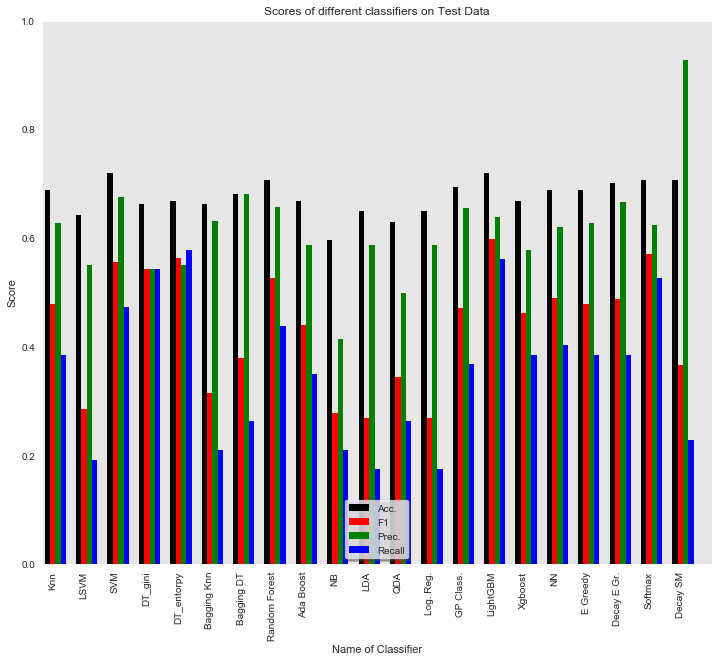

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)
accData = [metrics.accuracy_score(y_deploy, y_pred_neigh),
           metrics.accuracy_score(y_deploy, y_pred_svm_linear), 
           metrics.accuracy_score(y_deploy, y_pred_svm), 
           metrics.accuracy_score(y_deploy, y_pred_gtgini),
           metrics.accuracy_score(y_deploy, y_pred_dt_IG), 
           metrics.accuracy_score(y_deploy, y_pred_dt_BGKN),
           metrics.accuracy_score(y_deploy, y_pred_dt_BGDT), 
           metrics.accuracy_score(y_deploy, y_pred_dt_RF),
           metrics.accuracy_score(y_deploy, y_pred_dt_AD), 
           metrics.accuracy_score(y_deploy, y_pred_NB),
           metrics.accuracy_score(y_deploy, y_pred_dt_LDA), 
           metrics.accuracy_score(y_deploy, y_pred_dt_QDA),           
           metrics.accuracy_score(y_deploy, y_pred_LR),
           metrics.accuracy_score(y_deploy, y_pred_GP),
           metrics.accuracy_score(y_deploy, y_pred_gbm),
           metrics.accuracy_score(y_deploy, y_pred_xgboost),
           metrics.accuracy_score(y_deploy, y_pred_NN),        
           metrics.accuracy_score(y_deploy, y_pred_EG),
           metrics.accuracy_score(y_deploy, y_pred_AEG),
           metrics.accuracy_score(y_deploy, y_pred_SM),
           metrics.accuracy_score(y_deploy, y_pred_ASM)]
          
PresionData = [metrics.precision_score(y_deploy, y_pred_neigh),
               metrics.precision_score(y_deploy, y_pred_svm_linear),
               metrics.precision_score(y_deploy, y_pred_svm),
               metrics.precision_score(y_deploy, y_pred_gtgini),
               metrics.precision_score(y_deploy, y_pred_dt_IG),
               metrics.precision_score(y_deploy, y_pred_dt_BGKN),
               metrics.precision_score(y_deploy, y_pred_dt_BGDT),
               metrics.precision_score(y_deploy, y_pred_dt_RF),
               metrics.precision_score(y_deploy, y_pred_dt_AD),
               metrics.precision_score(y_deploy, y_pred_NB),
               metrics.precision_score(y_deploy, y_pred_dt_LDA),
               metrics.precision_score(y_deploy, y_pred_dt_QDA),              
               metrics.precision_score(y_deploy, y_pred_LR),
               metrics.precision_score(y_deploy, y_pred_GP),
               metrics.precision_score(y_deploy, y_pred_gbm),
               metrics.precision_score(y_deploy, y_pred_xgboost),
               metrics.precision_score(y_deploy, y_pred_NN),
               metrics.precision_score(y_deploy, y_pred_EG),
               metrics.precision_score(y_deploy, y_pred_AEG),
               metrics.precision_score(y_deploy, y_pred_SM),
               metrics.precision_score(y_deploy, y_pred_ASM)]

RecallData = [ metrics.recall_score(y_deploy, y_pred_neigh),
              metrics.recall_score(y_deploy, y_pred_svm_linear),
              metrics.recall_score(y_deploy, y_pred_svm),
              metrics.recall_score(y_deploy, y_pred_gtgini),
              metrics.recall_score(y_deploy, y_pred_dt_IG),
              metrics.recall_score(y_deploy, y_pred_dt_BGKN),
              metrics.recall_score(y_deploy, y_pred_dt_BGDT),
              metrics.recall_score(y_deploy, y_pred_dt_RF),
              metrics.recall_score(y_deploy, y_pred_dt_AD),
              metrics.recall_score(y_deploy, y_pred_NB),
              metrics.recall_score(y_deploy, y_pred_dt_LDA),
              metrics.recall_score(y_deploy, y_pred_dt_QDA),
              metrics.recall_score(y_deploy, y_pred_LR),
              metrics.recall_score(y_deploy, y_pred_GP),
              metrics.recall_score(y_deploy, y_pred_gbm),
              metrics.recall_score(y_deploy, y_pred_xgboost),       
              metrics.recall_score(y_deploy, y_pred_NN),
              metrics.recall_score(y_deploy, y_pred_AEG),
              metrics.recall_score(y_deploy, y_pred_EG),
              metrics.recall_score(y_deploy, y_pred_SM),
              metrics.recall_score(y_deploy, y_pred_ASM)]

F1Data = [metrics.f1_score(y_deploy, y_pred_neigh),
          metrics.f1_score(y_deploy, y_pred_svm_linear),
          metrics.f1_score(y_deploy, y_pred_svm),
          metrics.f1_score(y_deploy, y_pred_gtgini),
          metrics.f1_score(y_deploy, y_pred_dt_IG),
          metrics.f1_score(y_deploy, y_pred_dt_BGKN),
          metrics.f1_score(y_deploy, y_pred_dt_BGDT),
          metrics.f1_score(y_deploy, y_pred_dt_RF),
          metrics.f1_score(y_deploy, y_pred_dt_AD),
          metrics.f1_score(y_deploy, y_pred_NB),
          metrics.f1_score(y_deploy, y_pred_dt_LDA),
          metrics.f1_score(y_deploy, y_pred_dt_QDA),         
          metrics.f1_score(y_deploy, y_pred_LR),
          metrics.f1_score(y_deploy, y_pred_GP),
          metrics.f1_score(y_deploy, y_pred_gbm),
          metrics.f1_score(y_deploy, y_pred_xgboost),
          metrics.f1_score(y_deploy, y_pred_NN),                             
          metrics.f1_score(y_deploy, y_pred_EG),
          metrics.f1_score(y_deploy, y_pred_AEG),
          metrics.f1_score(y_deploy, y_pred_SM),
          metrics.f1_score(y_deploy, y_pred_ASM)]         



N = len(accData)
## necessary variables
ind = np.arange(N)                # the x locations for the groups
width = 0.17                     # the width of the bars
## the bars
rects1 = ax.bar(ind, accData, width,
                color='black',
                #yerr=menStd,
                error_kw=dict(elinewidth=2,ecolor='red'))
rects2 = ax.bar(ind+width, F1Data, width,
                    color='red',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='black'))
rects3 = ax.bar(ind+width+width, PresionData, width,
                    color='green',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='blue'))
rects4 = ax.bar(ind+width+width+width, RecallData, width,
                    color='blue',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='green'))
# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,1)
ax.set_ylabel('Score')
ax.set_xlabel('Name of Classifier')
ax.set_title('Scores of different classifiers on Test Data')
xTickMarks = ['Knn', 'LSVM', 'SVM', 'DT_gini', 'DT_entorpy' ,
              'Bagging Knn' , 'Bagging DT' , 'Random Forest' , 'Ada Boost' ,
              'NB' , 'LDA' , 'QDA' ,'Log. Reg.' ,'GP Class.','LightGBM','Xgboost',
              'NN',  'E Greedy' , 'Decay E Gr.' , 'Softmax', 'Decay SM']
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=90, fontsize=10)
## add a legend
ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0]), ('Acc.', 'F1' , 'Prec.' , 'Recall') , loc=8, fancybox=True, 
          frameon=True, shadow=True)
ax.set_facecolor('0.9')

ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.spines['top'].set_linewidth(0.9)
ax.spines['right'].set_linewidth(0.9)
ax.spines['bottom'].set_linewidth(0.9)
ax.spines['left'].set_linewidth(0.9)
ax.grid(False)
plt.show()

In [31]:

df1 = pd.DataFrame({'Matric': xTickMarks,
                    'Accuracy':accData, 
                   'Precision': PresionData, 
                   'Recall': RecallData, 
                    'F1 Score': F1Data})
############################################################################################################
bar = Bar(df1,
          values=blend('Accuracy', 'F1 Score', 'Precision','Recall', name='Scores', labels_name='Score'),
          label=cat(columns='Matric', sort=False),
          stack=cat(columns='Score', sort=False),
          color=color(columns='Score', palette=['SaddleBrown', 'Silver', 'Goldenrod', 'Grey'],
                      sort=False),
          legend='bottom_center', xlabel="List of Models", ylabel="The Scores",
          title="Scores of different Models", 
          tooltips=[('Score', '@Score'), ('Model', '@Matric')],
          tools=TOOLS, plot_width=900, plot_height=800)
bar.title.align = "center"
bar.xaxis.major_label_orientation = pi/2
###############################################################################################################
p = Bar(df1, label='Matric', 
        values = blend('Accuracy', 'F1 Score', 'Precision','Recall', name='Scores', labels_name='Score'),
        group=cat(columns='Score', sort=False),
        title="Scores of different Models", legend='bottom_center',
       tools=TOOLS, plot_width=900, plot_height=600,
       xlabel='List of Models', ylabel='The Scores')
p.title.align = "center"
#p.yaxis.major_label_orientation = "vertical"
p.xaxis.major_label_orientation = pi/2
#########################################################################################################
data = dict(
    Acc = accData,
    Pre = PresionData,
    Rec = RecallData,
    F1 = F1Data,
)
area1 = Area(data, title="The trend of score over Models", legend="bottom_center",
             xlabel='List of Models', ylabel='The Scores',
            tools=TOOLS, plot_width=450, plot_height=300)
area1.title.align = "center"
area2 = Area(data, title="The trend of score over Models", legend="bottom_center",
             stack=True, xlabel='List of Models', ylabel='The Scores',
            tools=TOOLS, plot_width=450, plot_height=300)
area2.title.align = "center"
#########################################################################################################
show(bar)
show(p)
#show(area1)
#show(area2)
show(row(area1, area2))

Loading BokehJS ...

## Hedge and EXP3

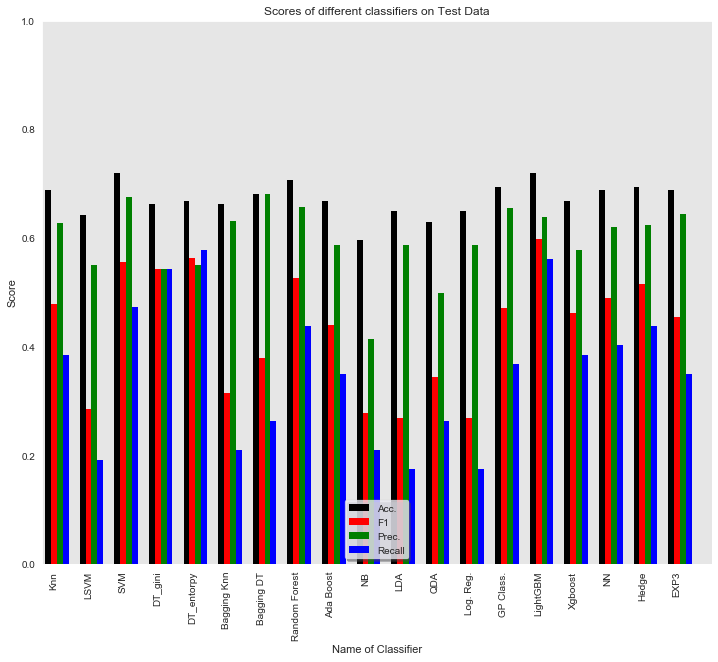

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
accData = [metrics.accuracy_score(y_deploy, y_pred_neigh),
           metrics.accuracy_score(y_deploy, y_pred_svm_linear), 
           metrics.accuracy_score(y_deploy, y_pred_svm), 
           metrics.accuracy_score(y_deploy, y_pred_gtgini),
           metrics.accuracy_score(y_deploy, y_pred_dt_IG), 
           metrics.accuracy_score(y_deploy, y_pred_dt_BGKN),
           metrics.accuracy_score(y_deploy, y_pred_dt_BGDT), 
           metrics.accuracy_score(y_deploy, y_pred_dt_RF),
           metrics.accuracy_score(y_deploy, y_pred_dt_AD), 
           metrics.accuracy_score(y_deploy, y_pred_NB),
           metrics.accuracy_score(y_deploy, y_pred_dt_LDA), 
           metrics.accuracy_score(y_deploy, y_pred_dt_QDA),           
           metrics.accuracy_score(y_deploy, y_pred_LR),
           metrics.accuracy_score(y_deploy, y_pred_GP),
           metrics.accuracy_score(y_deploy, y_pred_gbm),
           metrics.accuracy_score(y_deploy, y_pred_xgboost),
           metrics.accuracy_score(y_deploy, y_pred_NN),        
           metrics.accuracy_score(y_deploy, y_pred_HG),
           metrics.accuracy_score(y_deploy, y_pred_EXP)]
          
PresionData = [metrics.precision_score(y_deploy, y_pred_neigh),
               metrics.precision_score(y_deploy, y_pred_svm_linear),
               metrics.precision_score(y_deploy, y_pred_svm),
               metrics.precision_score(y_deploy, y_pred_gtgini),
               metrics.precision_score(y_deploy, y_pred_dt_IG),
               metrics.precision_score(y_deploy, y_pred_dt_BGKN),
               metrics.precision_score(y_deploy, y_pred_dt_BGDT),
               metrics.precision_score(y_deploy, y_pred_dt_RF),
               metrics.precision_score(y_deploy, y_pred_dt_AD),
               metrics.precision_score(y_deploy, y_pred_NB),
               metrics.precision_score(y_deploy, y_pred_dt_LDA),
               metrics.precision_score(y_deploy, y_pred_dt_QDA),              
               metrics.precision_score(y_deploy, y_pred_LR),
               metrics.precision_score(y_deploy, y_pred_GP),
               metrics.precision_score(y_deploy, y_pred_gbm),
               metrics.precision_score(y_deploy, y_pred_xgboost),
               metrics.precision_score(y_deploy, y_pred_NN),
               metrics.precision_score(y_deploy, y_pred_HG),
               metrics.precision_score(y_deploy, y_pred_EXP)]

RecallData = [ metrics.recall_score(y_deploy, y_pred_neigh),
              metrics.recall_score(y_deploy, y_pred_svm_linear),
              metrics.recall_score(y_deploy, y_pred_svm),
              metrics.recall_score(y_deploy, y_pred_gtgini),
              metrics.recall_score(y_deploy, y_pred_dt_IG),
              metrics.recall_score(y_deploy, y_pred_dt_BGKN),
              metrics.recall_score(y_deploy, y_pred_dt_BGDT),
              metrics.recall_score(y_deploy, y_pred_dt_RF),
              metrics.recall_score(y_deploy, y_pred_dt_AD),
              metrics.recall_score(y_deploy, y_pred_NB),
              metrics.recall_score(y_deploy, y_pred_dt_LDA),
              metrics.recall_score(y_deploy, y_pred_dt_QDA),
              metrics.recall_score(y_deploy, y_pred_LR),
              metrics.recall_score(y_deploy, y_pred_GP),
              metrics.recall_score(y_deploy, y_pred_gbm),
              metrics.recall_score(y_deploy, y_pred_xgboost),       
              metrics.recall_score(y_deploy, y_pred_NN),
              metrics.recall_score(y_deploy, y_pred_HG),
              metrics.recall_score(y_deploy, y_pred_EXP)]

F1Data = [metrics.f1_score(y_deploy, y_pred_neigh),
          metrics.f1_score(y_deploy, y_pred_svm_linear),
          metrics.f1_score(y_deploy, y_pred_svm),
          metrics.f1_score(y_deploy, y_pred_gtgini),
          metrics.f1_score(y_deploy, y_pred_dt_IG),
          metrics.f1_score(y_deploy, y_pred_dt_BGKN),
          metrics.f1_score(y_deploy, y_pred_dt_BGDT),
          metrics.f1_score(y_deploy, y_pred_dt_RF),
          metrics.f1_score(y_deploy, y_pred_dt_AD),
          metrics.f1_score(y_deploy, y_pred_NB),
          metrics.f1_score(y_deploy, y_pred_dt_LDA),
          metrics.f1_score(y_deploy, y_pred_dt_QDA),         
          metrics.f1_score(y_deploy, y_pred_LR),
          metrics.f1_score(y_deploy, y_pred_GP),
          metrics.f1_score(y_deploy, y_pred_gbm),
          metrics.f1_score(y_deploy, y_pred_xgboost),
          metrics.f1_score(y_deploy, y_pred_NN),                             
          metrics.f1_score(y_deploy, y_pred_HG),
          metrics.f1_score(y_deploy, y_pred_EXP)]         



N = len(accData)
## necessary variables
ind = np.arange(N)                # the x locations for the groups
width = 0.17                     # the width of the bars
## the bars
rects1 = ax.bar(ind, accData, width,
                color='black',
                #yerr=menStd,
                error_kw=dict(elinewidth=2,ecolor='red'))
rects2 = ax.bar(ind+width, F1Data, width,
                    color='red',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='black'))
rects3 = ax.bar(ind+width+width, PresionData, width,
                    color='green',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='blue'))
rects4 = ax.bar(ind+width+width+width, RecallData, width,
                    color='blue',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='green'))
# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,1)
ax.set_ylabel('Score')
ax.set_xlabel('Name of Classifier')
ax.set_title('Scores of different classifiers on Test Data')
xTickMarks = ['Knn', 'LSVM', 'SVM', 'DT_gini', 'DT_entorpy' ,
              'Bagging Knn' , 'Bagging DT' , 'Random Forest' , 'Ada Boost' ,
              'NB' , 'LDA' , 'QDA' ,'Log. Reg.' ,'GP Class.','LightGBM','Xgboost',
              'NN', 'Hedge', 'EXP3']
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=90, fontsize=10)
## add a legend
ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0]), ('Acc.', 'F1' , 'Prec.' , 'Recall') , loc=8, fancybox=True, 
          frameon=True, shadow=True)
ax.set_facecolor('0.9')
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.spines['top'].set_linewidth(0.9)
ax.spines['right'].set_linewidth(0.9)
ax.spines['bottom'].set_linewidth(0.9)
ax.spines['left'].set_linewidth(0.9)
ax.grid(False)
plt.show()

In [33]:

df1 = pd.DataFrame({'Matric': xTickMarks,
                    'Accuracy':accData, 
                   'Precision': PresionData, 
                   'Recall': RecallData, 
                    'F1 Score': F1Data})
############################################################################################################
bar = Bar(df1,
          values=blend('Accuracy', 'F1 Score', 'Precision','Recall', name='Scores', labels_name='Score'),
          label=cat(columns='Matric', sort=False),
          stack=cat(columns='Score', sort=False),
          color=color(columns='Score', palette=['SaddleBrown', 'Silver', 'Goldenrod', 'Grey'],
                      sort=False),
          legend='bottom_center', xlabel="List of Models", ylabel="The Scores",
          title="Scores of different Models", 
          tooltips=[('Score', '@Score'), ('Model', '@Matric')],
          tools=TOOLS, plot_width=900, plot_height=800)
bar.title.align = "center"
bar.xaxis.major_label_orientation = pi/2
###############################################################################################################
p = Bar(df1, label='Matric', 
        values = blend('Accuracy', 'F1 Score', 'Precision','Recall', name='Scores', labels_name='Score'),
        group=cat(columns='Score', sort=False),
        title="Scores of different Models", legend='bottom_center',
       tools=TOOLS, plot_width=900, plot_height=600,
       xlabel='List of Models', ylabel='The Scores')
p.title.align = "center"
#p.yaxis.major_label_orientation = "vertical"
p.xaxis.major_label_orientation = pi/2
#########################################################################################################
data = dict(
    Acc = accData,
    Pre = PresionData,
    Rec = RecallData,
    F1 = F1Data,
)
area1 = Area(data, title="The trend of score over Models", legend="bottom_center",
             xlabel='List of Models', ylabel='The Scores',
            tools=TOOLS, plot_width=450, plot_height=300)
area1.title.align = "center"
area2 = Area(data, title="The trend of score over Models", legend="bottom_center",
             stack=True, xlabel='List of Models', ylabel='The Scores',
            tools=TOOLS, plot_width=450, plot_height=300)
area2.title.align = "center"
#########################################################################################################
show(bar)
show(p)
#show(area1)
#show(area2)
show(row(area1, area2))

Loading BokehJS ...

## Thompson Sampling

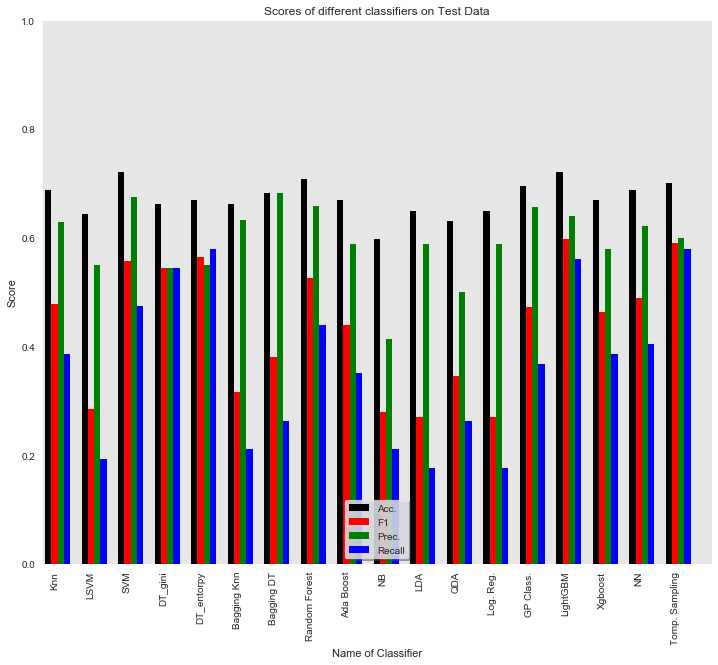

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)
accData = [metrics.accuracy_score(y_deploy, y_pred_neigh),
           metrics.accuracy_score(y_deploy, y_pred_svm_linear), 
           metrics.accuracy_score(y_deploy, y_pred_svm), 
           metrics.accuracy_score(y_deploy, y_pred_gtgini),
           metrics.accuracy_score(y_deploy, y_pred_dt_IG), 
           metrics.accuracy_score(y_deploy, y_pred_dt_BGKN),
           metrics.accuracy_score(y_deploy, y_pred_dt_BGDT), 
           metrics.accuracy_score(y_deploy, y_pred_dt_RF),
           metrics.accuracy_score(y_deploy, y_pred_dt_AD), 
           metrics.accuracy_score(y_deploy, y_pred_NB),
           metrics.accuracy_score(y_deploy, y_pred_dt_LDA), 
           metrics.accuracy_score(y_deploy, y_pred_dt_QDA),           
           metrics.accuracy_score(y_deploy, y_pred_LR),
           metrics.accuracy_score(y_deploy, y_pred_GP),
           metrics.accuracy_score(y_deploy, y_pred_gbm),
           metrics.accuracy_score(y_deploy, y_pred_xgboost),
           metrics.accuracy_score(y_deploy, y_pred_NN),
           metrics.accuracy_score(y_deploy, y_pred_TS)]
          
PresionData = [metrics.precision_score(y_deploy, y_pred_neigh),
               metrics.precision_score(y_deploy, y_pred_svm_linear),
               metrics.precision_score(y_deploy, y_pred_svm),
               metrics.precision_score(y_deploy, y_pred_gtgini),
               metrics.precision_score(y_deploy, y_pred_dt_IG),
               metrics.precision_score(y_deploy, y_pred_dt_BGKN),
               metrics.precision_score(y_deploy, y_pred_dt_BGDT),
               metrics.precision_score(y_deploy, y_pred_dt_RF),
               metrics.precision_score(y_deploy, y_pred_dt_AD),
               metrics.precision_score(y_deploy, y_pred_NB),
               metrics.precision_score(y_deploy, y_pred_dt_LDA),
               metrics.precision_score(y_deploy, y_pred_dt_QDA),              
               metrics.precision_score(y_deploy, y_pred_LR),
               metrics.precision_score(y_deploy, y_pred_GP),
               metrics.precision_score(y_deploy, y_pred_gbm),
               metrics.precision_score(y_deploy, y_pred_xgboost),
               metrics.precision_score(y_deploy, y_pred_NN),
               metrics.precision_score(y_deploy, y_pred_TS)]

RecallData = [ metrics.recall_score(y_deploy, y_pred_neigh),
              metrics.recall_score(y_deploy, y_pred_svm_linear),
              metrics.recall_score(y_deploy, y_pred_svm),
              metrics.recall_score(y_deploy, y_pred_gtgini),
              metrics.recall_score(y_deploy, y_pred_dt_IG),
              metrics.recall_score(y_deploy, y_pred_dt_BGKN),
              metrics.recall_score(y_deploy, y_pred_dt_BGDT),
              metrics.recall_score(y_deploy, y_pred_dt_RF),
              metrics.recall_score(y_deploy, y_pred_dt_AD),
              metrics.recall_score(y_deploy, y_pred_NB),
              metrics.recall_score(y_deploy, y_pred_dt_LDA),
              metrics.recall_score(y_deploy, y_pred_dt_QDA),
              metrics.recall_score(y_deploy, y_pred_LR),
              metrics.recall_score(y_deploy, y_pred_GP),
              metrics.recall_score(y_deploy, y_pred_gbm),
              metrics.recall_score(y_deploy, y_pred_xgboost),       
              metrics.recall_score(y_deploy, y_pred_NN),
              metrics.recall_score(y_deploy, y_pred_TS)]

F1Data = [metrics.f1_score(y_deploy, y_pred_neigh),
          metrics.f1_score(y_deploy, y_pred_svm_linear),
          metrics.f1_score(y_deploy, y_pred_svm),
          metrics.f1_score(y_deploy, y_pred_gtgini),
          metrics.f1_score(y_deploy, y_pred_dt_IG),
          metrics.f1_score(y_deploy, y_pred_dt_BGKN),
          metrics.f1_score(y_deploy, y_pred_dt_BGDT),
          metrics.f1_score(y_deploy, y_pred_dt_RF),
          metrics.f1_score(y_deploy, y_pred_dt_AD),
          metrics.f1_score(y_deploy, y_pred_NB),
          metrics.f1_score(y_deploy, y_pred_dt_LDA),
          metrics.f1_score(y_deploy, y_pred_dt_QDA),         
          metrics.f1_score(y_deploy, y_pred_LR),
          metrics.f1_score(y_deploy, y_pred_GP),
          metrics.f1_score(y_deploy, y_pred_gbm),
          metrics.f1_score(y_deploy, y_pred_xgboost),
          metrics.f1_score(y_deploy, y_pred_NN),                             
          metrics.f1_score(y_deploy, y_pred_TS)]         



N = len(accData)
## necessary variables
ind = np.arange(N)                # the x locations for the groups
width = 0.17                     # the width of the bars
## the bars
rects1 = ax.bar(ind, accData, width,
                color='black',
                #yerr=menStd,
                error_kw=dict(elinewidth=2,ecolor='red'))
rects2 = ax.bar(ind+width, F1Data, width,
                    color='red',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='black'))
rects3 = ax.bar(ind+width+width, PresionData, width,
                    color='green',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='blue'))
rects4 = ax.bar(ind+width+width+width, RecallData, width,
                    color='blue',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='green'))
# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,1)
ax.set_ylabel('Score')
ax.set_xlabel('Name of Classifier')
ax.set_title('Scores of different classifiers on Test Data')
xTickMarks = ['Knn', 'LSVM', 'SVM', 'DT_gini', 'DT_entorpy' ,
              'Bagging Knn' , 'Bagging DT' , 'Random Forest' , 'Ada Boost' ,
              'NB' , 'LDA' , 'QDA' ,'Log. Reg.' ,'GP Class.','LightGBM','Xgboost',
              'NN', 'Tomp. Sampling']
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=90, fontsize=10, )
## add a legend
ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0]), ('Acc.', 'F1' , 'Prec.' , 'Recall') , loc=8, fancybox=True, 
          frameon=True, shadow=True)
ax.set_facecolor('0.9')

ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.spines['top'].set_linewidth(0.9)
ax.spines['right'].set_linewidth(0.9)
ax.spines['bottom'].set_linewidth(0.9)
ax.spines['left'].set_linewidth(0.9)
ax.grid(False)

plt.show()

In [35]:

df1 = pd.DataFrame({'Matric': xTickMarks,
                    'Accuracy':accData, 
                   'Precision': PresionData, 
                   'Recall': RecallData, 
                    'F1 Score': F1Data})
############################################################################################################
bar = Bar(df1,
          values=blend('Accuracy', 'F1 Score', 'Precision','Recall', name='Scores', labels_name='Score'),
          label=cat(columns='Matric', sort=False),
          stack=cat(columns='Score', sort=False),
          color=color(columns='Score', palette=['SaddleBrown', 'Silver', 'Goldenrod', 'Grey'],
                      sort=False),
          legend='bottom_center', xlabel="List of Models", ylabel="The Scores",
          title="Scores of different Models", 
          tooltips=[('Score', '@Score'), ('Model', '@Matric')],
          tools=TOOLS, plot_width=900, plot_height=800)
bar.title.align = "center"
bar.xaxis.major_label_orientation = pi/2
###############################################################################################################
p = Bar(df1, label='Matric', 
        values = blend('Accuracy', 'F1 Score', 'Precision','Recall', name='Scores', labels_name='Score'),
        group=cat(columns='Score', sort=False),
        title="Scores of different Models", legend='bottom_center',
       tools=TOOLS, plot_width=900, plot_height=600,
       xlabel='List of Models', ylabel='The Scores')
p.title.align = "center"
#p.yaxis.major_label_orientation = "vertical"
p.xaxis.major_label_orientation = pi/2
#########################################################################################################
data = dict(
    Acc = accData,
    Pre = PresionData,
    Rec = RecallData,
    F1 = F1Data,
)
area1 = Area(data, title="The trend of score over Models", legend="bottom_center",
             xlabel='List of Models', ylabel='The Scores',
            tools=TOOLS, plot_width=450, plot_height=300)
area1.title.align = "center"
area2 = Area(data, title="The trend of score over Models", legend="bottom_center",
             stack=True, xlabel='List of Models', ylabel='The Scores',
            tools=TOOLS, plot_width=450, plot_height=300)
area2.title.align = "center"
#########################################################################################################
show(bar)
show(p)
#show(area1)
#show(area2)
show(row(area1, area2))

Loading BokehJS ...

# Compute Confusion Matrix

In [36]:
iris = datasets.load_iris()
from sklearn.metrics import confusion_matrix
plt.rcParams['figure.figsize'] = (15, 6)
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    target_names=['B', 'M']
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Compute Confusion on Knn

Confusion matrix, without normalization
[[84 13]
 [35 22]]
Normalized confusion matrix
[[ 0.87  0.13]
 [ 0.61  0.39]]


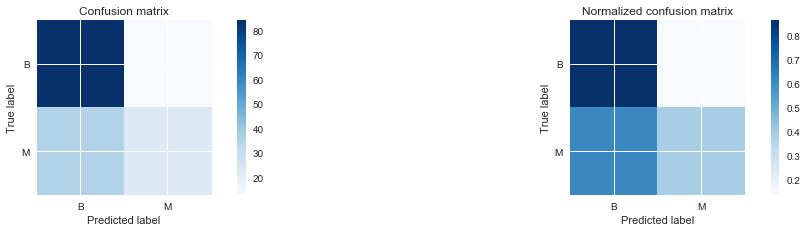

In [37]:
cm = confusion_matrix(y_deploy, y_pred_neigh)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()


## Compute Confusion on LSVM

Confusion matrix, without normalization
[[88  9]
 [46 11]]
Normalized confusion matrix
[[ 0.91  0.09]
 [ 0.81  0.19]]


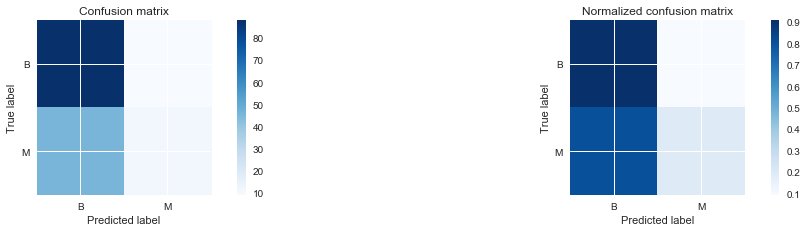

In [38]:
cm = confusion_matrix(y_deploy, y_pred_svm_linear)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on SVM

Confusion matrix, without normalization
[[84 13]
 [30 27]]
Normalized confusion matrix
[[ 0.87  0.13]
 [ 0.53  0.47]]


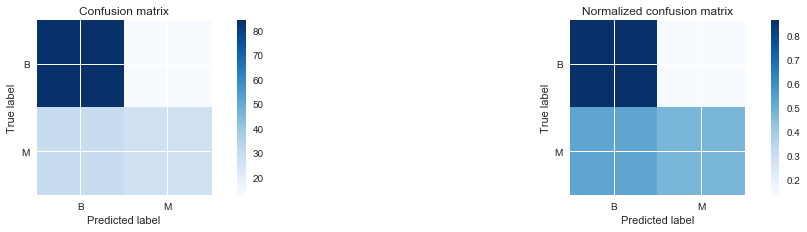

In [39]:
cm = confusion_matrix(y_deploy, y_pred_svm)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on DT with gini "CART"

Confusion matrix, without normalization
[[71 26]
 [26 31]]
Normalized confusion matrix
[[ 0.73  0.27]
 [ 0.46  0.54]]


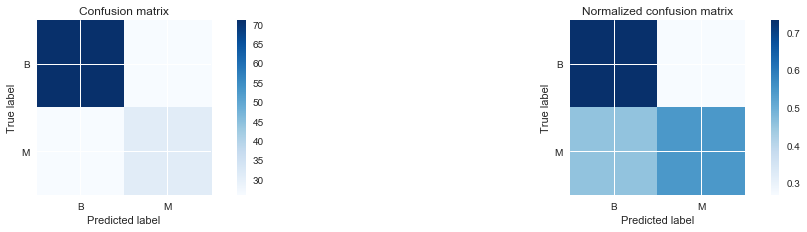

In [40]:
cm = confusion_matrix(y_deploy, y_pred_gtgini)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on DT with entory "C5.0"

Confusion matrix, without normalization
[[70 27]
 [24 33]]
Normalized confusion matrix
[[ 0.72  0.28]
 [ 0.42  0.58]]


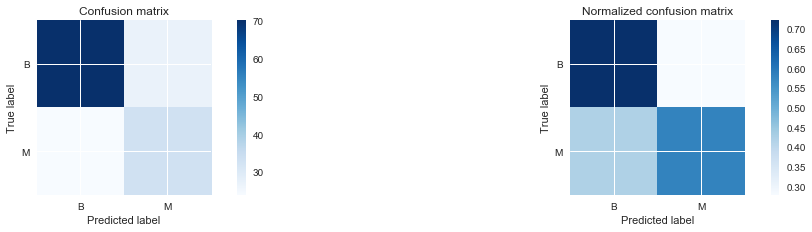

In [41]:
cm = confusion_matrix(y_deploy, y_pred_dt_IG)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on Bagging with Knn

Confusion matrix, without normalization
[[90  7]
 [45 12]]
Normalized confusion matrix
[[ 0.93  0.07]
 [ 0.79  0.21]]


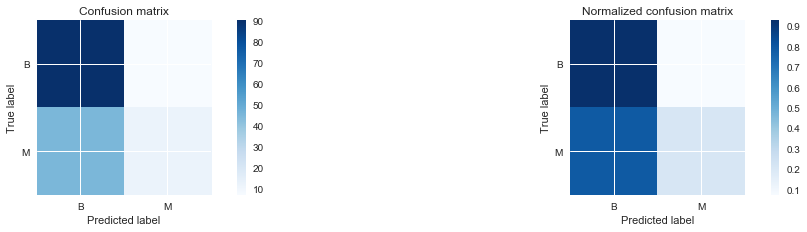

In [42]:
cm = confusion_matrix(y_deploy, y_pred_dt_BGKN)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on Bagging with DT "CART"

Confusion matrix, without normalization
[[90  7]
 [42 15]]
Normalized confusion matrix
[[ 0.93  0.07]
 [ 0.74  0.26]]


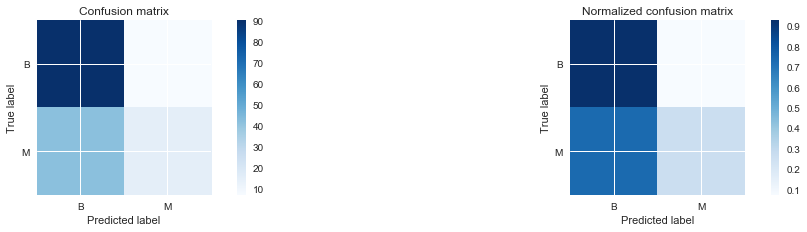

In [43]:
cm = confusion_matrix(y_deploy, y_pred_dt_BGDT)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on Random Forest

Confusion matrix, without normalization
[[84 13]
 [32 25]]
Normalized confusion matrix
[[ 0.87  0.13]
 [ 0.56  0.44]]


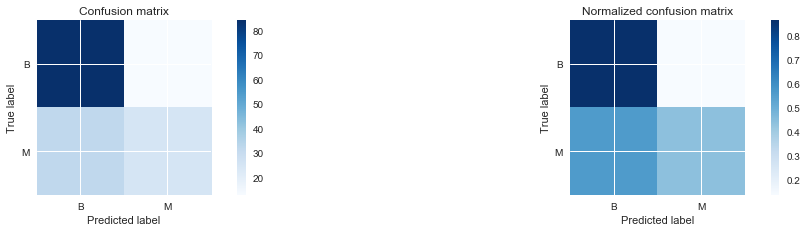

In [44]:
cm = confusion_matrix(y_deploy, y_pred_dt_RF)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on Ada Boost

Confusion matrix, without normalization
[[83 14]
 [37 20]]
Normalized confusion matrix
[[ 0.86  0.14]
 [ 0.65  0.35]]


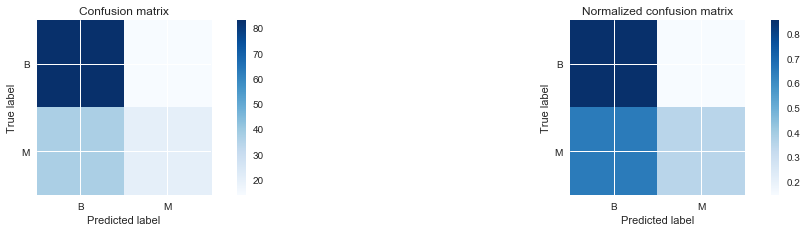

In [45]:
cm = confusion_matrix(y_deploy, y_pred_dt_AD)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on Naive Bayes


Confusion matrix, without normalization
[[80 17]
 [45 12]]
Normalized confusion matrix
[[ 0.82  0.18]
 [ 0.79  0.21]]


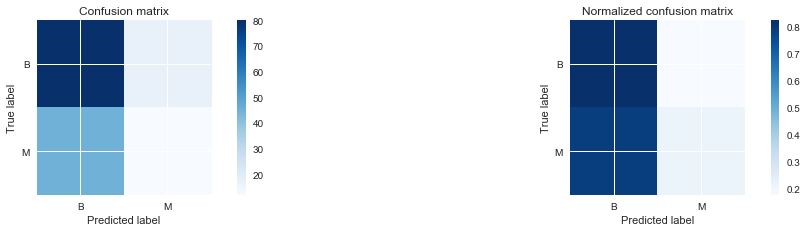

In [46]:
cm = confusion_matrix(y_deploy, y_pred_NB)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on LDA

Confusion matrix, without normalization
[[90  7]
 [47 10]]
Normalized confusion matrix
[[ 0.93  0.07]
 [ 0.82  0.18]]


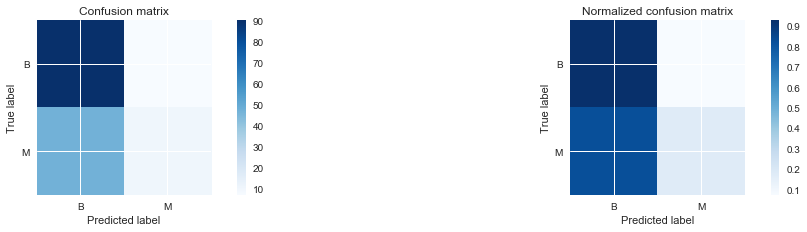

In [47]:
cm = confusion_matrix(y_deploy, y_pred_dt_LDA)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on QDA

Confusion matrix, without normalization
[[82 15]
 [42 15]]
Normalized confusion matrix
[[ 0.85  0.15]
 [ 0.74  0.26]]


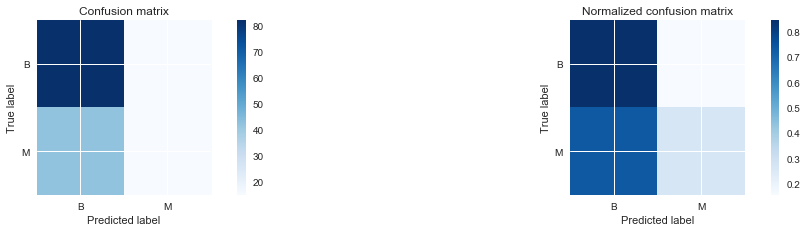

In [48]:
cm = confusion_matrix(y_deploy, y_pred_dt_QDA)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on NN


Confusion matrix, without normalization
[[83 14]
 [34 23]]
Normalized confusion matrix
[[ 0.86  0.14]
 [ 0.6   0.4 ]]


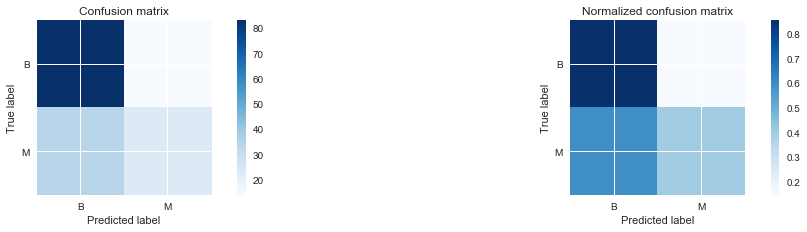

In [49]:
cm = confusion_matrix(y_deploy, y_pred_NN)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on NN 16.67% neurals removed

Confusion matrix, without normalization
[[75 22]
 [24 33]]
Normalized confusion matrix
[[ 0.77  0.23]
 [ 0.42  0.58]]


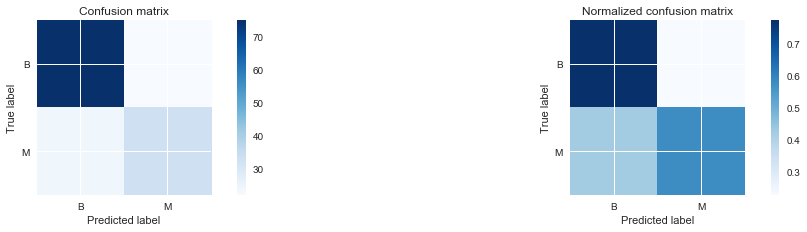

In [50]:
cm = confusion_matrix(y_deploy, y_pred_NN1)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on NN 33.33% neurals removed


Confusion matrix, without normalization
[[70 27]
 [22 35]]
Normalized confusion matrix
[[ 0.72  0.28]
 [ 0.39  0.61]]


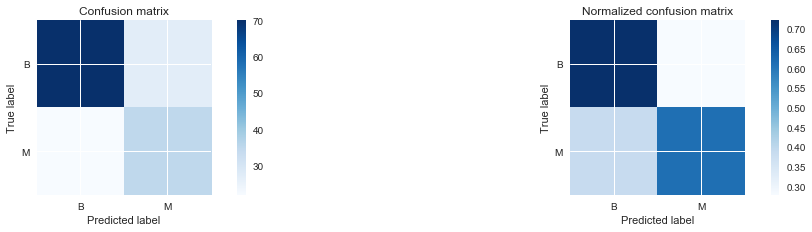

In [51]:
cm = confusion_matrix(y_deploy, y_pred_NN2)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on NN 50% neurals removed

Confusion matrix, without normalization
[[90  7]
 [46 11]]
Normalized confusion matrix
[[ 0.93  0.07]
 [ 0.81  0.19]]


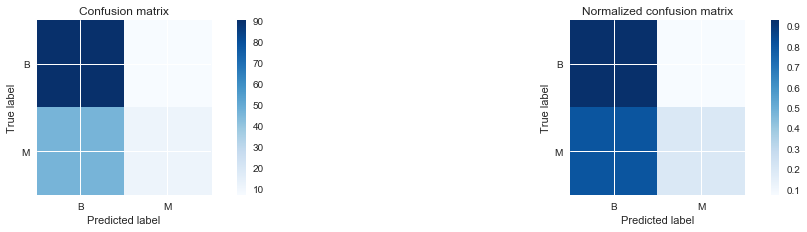

In [52]:
cm = confusion_matrix(y_deploy, y_pred_NN3)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()